In [1]:
import re
import unicodedata

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import euclidean
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from adjustText import adjust_text


sns.set(style="whitegrid")

In [2]:
TARGETS = ['England-Premier-League', 'Spain-LaLiga', 'Italy-Serie-A', 'Germany-Bundesliga', 'France-Ligue-1']
N_SIMILAR = 30

In [3]:
PL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/England-Premier-League"
L1 = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/France-Ligue-1"
GB = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Germany-Bundesliga"
SA = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Italy-Serie-A"
LL = "/Users/pervin0527/Upstage_Ai_Lab/04_EDA/project/Leagues/Spain-LaLiga"

In [4]:
DETAILED_LIST = [
    ## Defensive
    'Tackles',
    'Interception',
    'Fouls',
    'Cards',
    'Offsides',
    'Clearances',
    'Blocks',
    'Saves',

    ## Offensive
    'Shots',
    'Goals',
    'Dribbles',
    'Possession loss',
    'Aerial',

    ## Passing
    'Passes',
    'Key passes',
    'Assists'
]

In [5]:
ALIASES = {
    'Alisson Becker' : 'Alisson',
    'Thiago Alcântara' : 'Thiago',
    'Kepa' : 'Kepa Arrizabalaga',
    'Hamed Traorè' : 'Hamed Junior Traorè',
    'Andy Robertson' : 'Andrew Robertson',
    'Maximilian Kilman' : 'Max Kilman',
    'Toti Gomes' : 'Toti', 
    'Willy-Arnaud Boly' : 'Willy Boly',
    'Dan Bentley' : 'Daniel Bentley',
    'Vitalii Mykolenko' : 'Vitaliy Mykolenko',
    'Sam Amo-Ameyaw' : 'Samuel Amo-Ameyaw',
    'Kostas Tsimikas' : 'Konstantinos Tsimikas',
    'Alex Oxlade Chamberlain' : 'Alex Oxlade-Chamberlain',
    'Mykhailo Mudryk' : 'Mykhaylo Mudryk',
    'Illia Zabarnyi' : 'Ilya Zabarnyi',
    'Pape Sarr' : 'Pape Matar Sarr',
    'Mads Bech' : 'Mads Bech Sörensen',
    "Odeluga Offiah" : "Odel Offiah",
    "Karl Toko-Ekambi" : "Karl Toko Ekambi",
    "Alexsandro Ribeiro" : "Alexsandro",
    "Karl Toko-Ekambi" : "Karl Toko Ekambi",
    "Cheick Keita" : "Check Keita",
    "Yusuf Yazici" : "Yusuf Yazıcı",
    "Henrique" : "Henrique Silva",
    "Mickaël Barreto" : "Michaël Barreto",
    "Ruan" : "Ruan Levine",
    "Ben Touré" : "Ben Hamed Touré",
    "Noah Holm" : "Noah Jean Holm",
    "Eli Kroupi" : "Eli Junior Kroupi",
    "Rémy Labeau-Lascary" : "Rémy Labeau Lascary",
    "Valentin Atangana Edoa" : "Valentin Atangana",
    "Eric Choupo-Moting" : "Eric-Maxim Choupo-Moting",
    "Frederik Rønnow" : "Frederik Rönnow",
    "John Anthony Brooks" : "John Brooks",
    "Silas Katompa Mvumpa" : "Silas",
    "Jordan Siebatcheu" : "Jordan",
    "Mehmet Aydin" : "Mehmet Aydın",
    "Finn Becker" : "Finn Ole Becker",
    "Juan José Perea" : "Juan-José Perea",
    "Dikeni-Rafid Salifou" : "Dikeni Salifou",
    "Jean-Manuel Mbom" : "Jean Manuel Mbom",
    "Lucas Martínez" : "Lucas Martínez Quarta",
    "Ibañez" : "Roger Ibañez",
    "Giorgos Kyriakopoulos" : "Georgios Kyriakopoulos",
    "Giorgos Kyriakopoulos" : "",
    "José Palomino" : "José Luis Palomino",
    "Pawel Dawidowicz" : "Paweł Dawidowicz",
    "Przemyslaw Wisniewski" : "Przemysław Wiśniewski",
    "Simon Kjær" : "Simon Kjaer",
    "Joakim Mæhle" : "Joakim Maehle",
    "Igor Julio" : "Igor",
    "Hamed Traorè" : "Hamed Junior Traorè",
    "Nicolò Cocetta" : "Niccolò Cocetta",
    "Alberto Basso" : "Alberto Basso Ricci",
    "Emil Ceïde" : "Emil Konradsen Ceide",
    "Salvador Ferrer" : "Salva Ferrer",
    "Antonio Iervolino" : "Antonio Pio Iervolino",
    "Thórir Helgason" : "Thórir Jóhann Helgason",
    "Marios Oikonomou" : "Marios Ikonomou",
    "Christian Gytkjær" : "Christian Gytkjaer",
    "Mikael Ellertsson" : "Mikael Egill Ellertsson",
    "José Giménez" : "José María Giménez",
    "Reinildo" : "Reinildo Mandava",
    "Adri Embarba" : "Adrián Embarba",
    "Anuar Tuhami" : "Anuar",
    "Copete" : "José Copete",
    "Adri Embarba" : "Adrián Embarba",
    "Valentín Castellanos" : "Taty Castellanos",
    "Vinicius Souza" : "Vini Souza",
    "Nacho" : "Nacho Fernández",
    "Djené Dakonam" : "Djené",
    "Álex Pozo" : "Alejandro Pozo",
    "Dani Carvajal" : "Daniel Carvajal",
    "Yassine Bounou" : "Bono",
    "Jon Olasagasti" : "Jon Ander Olasagasti",
    "Rober" : "Rober González",
    "Anthony Lozano" : "Choco Lozano",
    "Malcom Adu" : "Adu Ares",
    "Mamadou Fall" : "Mamadou Mbacke",
    "José Mari Martín" : "José Mari",
    "Nabili Zoubdi Touaizi" : "Nabil Touaizi",
    "Simo" : "Simo Keddari",
    "Marezi" : "Marko Milovanovic",
}

# Player Stats, Team Stats

In [6]:
PL_TEAM_STATS = f'{PL}/22-23_teams_stats-cleaned.csv'
L1_TEAM_STATS = f'{L1}/22-23_teams_stats-cleaned.csv'
GB_TEAM_STATS = f'{GB}/22-23_teams_stats-cleaned.csv'
SA_TEAM_STATS = f'{SA}/22-23_teams_stats-cleaned.csv'
LL_TEAM_STATS = f'{LL}/22-23_teams_stats-cleaned.csv'

pl_team_stats_df = pd.read_csv(PL_TEAM_STATS)
l1_team_stats_df = pd.read_csv(L1_TEAM_STATS)
gb_team_stats_df = pd.read_csv(GB_TEAM_STATS)
sa_team_stats_df = pd.read_csv(SA_TEAM_STATS)
ll_team_stats_df = pd.read_csv(LL_TEAM_STATS)

pl_team_stats_df['League'] = 'England-Premier-League'
l1_team_stats_df['League'] = 'France-Ligue-1'
gb_team_stats_df['League'] = 'Germany-Bundesliga'
sa_team_stats_df['League'] = 'Italy-Serie-A'
ll_team_stats_df['League'] = 'Spain-LaLiga'

all_teams_stats = pd.concat([
    pl_team_stats_df,
    l1_team_stats_df,
    gb_team_stats_df,
    sa_team_stats_df,
    ll_team_stats_df    
], ignore_index=True)

print(all_teams_stats.head(10))
all_teams_stats.to_csv('./Leagues/all_teams_stats.csv', index=False)

           team_name   P   W   D   L  GF  GA  GD  Pts  Goals  ...  \
0    Manchester City  38  28   5   5  94  33  61   89     94  ...   
1            Arsenal  38  26   6   6  88  43  45   84     88  ...   
2  Manchester United  38  23   6   9  58  43  15   75     58  ...   
3          Newcastle  38  19  14   5  68  33  35   71     68  ...   
4          Liverpool  38  19  10   9  75  47  28   67     75  ...   
5           Brighton  38  18   8  12  72  53  19   62     72  ...   
6        Aston Villa  38  18   7  13  51  46   5   61     51  ...   
7          Tottenham  38  18   6  14  70  63   7   60     70  ...   
8          Brentford  38  15  14   9  58  46  12   59     58  ...   
9             Fulham  38  15   7  16  55  53   2   52     55  ...   

   Offsides pg  Shots OT pg  Dribbles pg  Fouled pg     xG  GoalsDiff  xGDiff  \
0          1.3          5.8          5.8        5.8  81.39         92   10.61   
1          1.5          5.4          5.4        5.4  71.36         84   12.64 

In [7]:
PL_PLAYER_STATS = f'{PL}/22-23_players_stats-cleaned.csv'
L1_PLAYER_STATS = f'{L1}/22-23_players_stats-cleaned.csv'
GB_PLAYER_STATS = f'{GB}/22-23_players_stats-cleaned.csv'
SA_PLAYER_STATS = f'{SA}/22-23_players_stats-cleaned.csv'
LL_PLAYER_STATS = f'{LL}/22-23_players_stats-cleaned.csv'

pl_players_stats_df = pd.read_csv(PL_PLAYER_STATS)
l1_players_stats_df = pd.read_csv(L1_PLAYER_STATS)
gb_players_stats_df = pd.read_csv(GB_PLAYER_STATS)
sa_players_stats_df = pd.read_csv(SA_PLAYER_STATS)
ll_players_stats_df = pd.read_csv(LL_PLAYER_STATS)

all_players_stats = pd.concat([
    pl_players_stats_df,
    l1_players_stats_df,
    gb_players_stats_df,
    sa_players_stats_df,
    ll_players_stats_df,    
])

all_players_stats.head(10)
all_players_stats.to_csv('./Leagues/all_players_stats.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


# Player Values, Team Values

In [8]:
PL_TEAM_VALUES = f'{PL}/22-23_teams_values-cleaned.csv'
L1_TEAM_VALUES = f'{L1}/22-23_teams_values-cleaned.csv'
GB_TEAM_VALUES = f'{GB}/22-23_teams_values-cleaned.csv'
SA_TEAM_VALUES = f'{SA}/22-23_teams_values-cleaned.csv'
LL_TEAM_VALUES = f'{LL}/22-23_teams_values-cleaned.csv'

pl_team_values_df = pd.read_csv(PL_TEAM_VALUES)
l1_team_values_df = pd.read_csv(L1_TEAM_VALUES)
gb_team_values_df = pd.read_csv(GB_TEAM_VALUES)
sa_team_values_df = pd.read_csv(SA_TEAM_VALUES)
ll_team_values_df = pd.read_csv(LL_TEAM_VALUES)

all_teams_values = pd.concat([
    pl_team_values_df,
    l1_team_values_df,
    gb_team_values_df,
    sa_team_values_df,
    ll_team_values_df,    
])

all_teams_values.head(10)
all_teams_values.to_csv('./Leagues/all_teams_values.csv', index=False)

In [9]:
PL_PLAYER_VALUES = f'{PL}/22-23_players_values-cleaned.csv'
L1_PLAYER_VALUES = f'{L1}/22-23_players_values-cleaned.csv'
GB_PLAYER_VALUES = f'{GB}/22-23_players_values-cleaned.csv'
SA_PLAYER_VALUES = f'{SA}/22-23_players_values-cleaned.csv'
LL_PLAYER_VALUES = f'{LL}/22-23_players_values-cleaned.csv'

pl_player_values_df = pd.read_csv(PL_PLAYER_VALUES)
l1_player_values_df = pd.read_csv(L1_PLAYER_VALUES)
gb_player_values_df = pd.read_csv(GB_PLAYER_VALUES)
sa_player_values_df = pd.read_csv(SA_PLAYER_VALUES)
ll_player_values_df = pd.read_csv(LL_PLAYER_VALUES)

all_players_values = pd.concat([
    pl_player_values_df,
    l1_player_values_df,
    gb_player_values_df,
    sa_player_values_df,
    ll_player_values_df,    
])

all_players_values.head(10)
all_players_values.to_csv('./Leagues/all_players_values.csv', index=False)

# Player Detailed Stats

In [10]:
def read_detailed_csv(path):
    detailed = DETAILED_LIST[0]
    df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
    for detailed in DETAILED_LIST[1:]:
        next_df = pd.read_csv(f'{path}/22-23_players_{detailed}.csv')
        df = pd.merge(df, next_df, on=['player_name', 'team_name'], how='inner')
    
    return df

pl_player_detailed_df = read_detailed_csv(PL)
l1_player_detailed_df = read_detailed_csv(L1)
gb_player_detailed_df = read_detailed_csv(GB)
sa_player_detailed_df = read_detailed_csv(SA)
ll_player_detailed_df = read_detailed_csv(LL)

all_players_details = pd.concat([
    pl_player_detailed_df,
    l1_player_detailed_df,
    gb_player_detailed_df,
    sa_player_detailed_df,
    ll_player_detailed_df,    
])

all_players_details.head(10)
all_players_details.to_csv('./Leagues/all_players_stats_details.csv', index=False)

# 데이터별 player_name 통합 + 포지션 재설정.

In [11]:
def normalize_names(name):
    """이름을 정규화하여 비교가능한 형태로 만듦."""
    name = unicodedata.normalize('NFKD', name).encode('ascii', errors='ignore').decode('ascii')
    name = re.sub(r'[^\w\s]', '', name).lower()
    name_parts = name.split()
    name_parts.sort()
    return ' '.join(name_parts)

def apply_aliases(name):
    """별칭을 적용하여 데이터의 일관성을 높임."""
    normalized_name = name.strip().title()
    return ALIASES.get(normalized_name, normalized_name)

# 데이터에 별칭 먼저 적용
all_players_stats['player_name'] = all_players_stats['player_name'].apply(apply_aliases)
all_players_values['Name'] = all_players_values['Name'].apply(apply_aliases)

# 정규화된 이름 적용
all_players_stats['normalized_name'] = all_players_stats['player_name'].apply(normalize_names)
all_players_values['normalized_name'] = all_players_values['Name'].apply(normalize_names)

# 병합 진행
merged_data = pd.merge(all_players_stats, all_players_values[['normalized_name', 'Position']], on='normalized_name', how='left')
merged_data['position'] = merged_data['Position']

merged_data = merged_data.dropna(subset=['position'])
position_cols = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
merged_data = merged_data.drop(columns=['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6', 'normalized_name', 'Position'], errors='ignore')

all_players_details['player_name'] = merged_data['player_name']
all_players_details['team_name'] = merged_data['team_name']
all_players_details = all_players_details.drop(columns=['normalize_names', 'normalized_name'], errors='ignore')

all_players_stats = merged_data
merged_data.to_csv('./Leagues/all_players_stats.csv', index=False)
all_players_details.to_csv('./Leagues/all_players_stats_details.csv', index=False)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2201: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [12]:
all_players_stats.head(10)

player_name          team_name  age            position   Apps  Mins  \
0    Asmir Begovic            Everton   36          Goalkeeper      1    90   
1  Kevin De Bruyne    Manchester City   32  Attacking Midfield  28(4)  2425   
2    Stefan Ortega    Manchester City   31          Goalkeeper      3   270   
3   Erling Haaland    Manchester City   23      Centre-Forward  33(2)  2779   
4       Harry Kane          Tottenham   30      Centre-Forward     38  3408   
5  Bruno Fernandes  Manchester United   29  Attacking Midfield     37  3320   
6    Gabriel Jesus            Arsenal   27      Centre-Forward  24(2)  2075   
7  Kieran Trippier          Newcastle   33          Right-Back     38  3348   
8      Bukayo Saka            Arsenal   22        Right Winger  37(1)  3195   
9      Solly March           Brighton   29        Right Winger  31(2)  2728   

   Goals  Assists  Yel  Red  ...  Unsuccessful touches  Average_per_pass  \
0      0        0    0    0  ...                   0.0              25.0   
1      7       16    1    0  ...                   1.3              42.4   
2      0        0    0    0  ...                   0.0              50.3   
3     36        8    5    0  ...                   1.5              13.7   
4     30        3    6    0  ...                   1.9              22.4   
5      8        8    6    0  ...                   1.1              50.1   
6     11        6    6    0  ...                   3.4              25.9   
7      1        7    5    0  ...                   0.7              54.3   
8     14       11    6    0  ...                   2.1              32.5   
9      7        7    2    0  ...                   1.7              33.4   

   Crosses_per_game  Longpass_per_game  Through_ball_per_game     xG  xGDiff  \
0               0.0                5.0                    0.0    NaN     NaN   
1               2.0                2.5                    0.5   4.93    2.07   
2               0.0                7.3                    0.0    NaN     NaN   
3               0.0                0.1                    0.1  30.88    5.12   
4               0.2                1.9                    0.3  22.49    7.51   
5               0.9                3.1                    0.6   8.81   -0.81   
6               0.1                0.6                    0.1  14.24   -3.24   
7               3.6                3.9                    0.2   0.88    0.12   
8               1.0                0.9                    0.0  10.21    3.79   
9               1.1                2.1                    0.1   9.31   -2.31   

   xGPerNinety  totalShots  xGPerShot  
0          NaN         NaN        NaN  
1         0.18        65.0       0.08  
2          NaN         NaN        NaN  
3         1.00       123.0       0.25  
4         0.59       130.0       0.17  
5         0.24        92.0       0.10  
6         0.62        77.0       0.18  
7         0.02        14.0       0.06  
8         0.29        89.0       0.11  
9         0.31        74.0       0.13  

[10 rows x 38 columns]

# 포지션별로 각 리그의 top3 팀선수들 선택

In [13]:
all_teams_stats.head(10)

team_name   P   W   D   L  GF  GA  GD  Pts  Goals  ...  \
0    Manchester City  38  28   5   5  94  33  61   89     94  ...   
1            Arsenal  38  26   6   6  88  43  45   84     88  ...   
2  Manchester United  38  23   6   9  58  43  15   75     58  ...   
3          Newcastle  38  19  14   5  68  33  35   71     68  ...   
4          Liverpool  38  19  10   9  75  47  28   67     75  ...   
5           Brighton  38  18   8  12  72  53  19   62     72  ...   
6        Aston Villa  38  18   7  13  51  46   5   61     51  ...   
7          Tottenham  38  18   6  14  70  63   7   60     70  ...   
8          Brentford  38  15  14   9  58  46  12   59     58  ...   
9             Fulham  38  15   7  16  55  53   2   52     55  ...   

   Offsides pg  Shots OT pg  Dribbles pg  Fouled pg     xG  GoalsDiff  xGDiff  \
0          1.3          5.8          5.8        5.8  81.39         92   10.61   
1          1.5          5.4          5.4        5.4  71.36         84   12.64   
2          2.1          5.7          5.7        5.7  67.92         56  -11.92   
3          1.9          5.2          5.2        5.2  73.75         64   -9.75   
4          2.2          5.6          5.6        5.6  78.59         71   -7.59   
5          1.8          6.1          6.1        6.1  76.71         68   -8.71   
6          1.5          4.0          4.0        4.0  49.51         49   -0.51   
7          1.8          5.2          5.2        5.2  57.52         68   10.48   
8          1.9          4.3          4.3        4.3  58.25         56   -2.25   
9          1.6          3.9          3.9        3.9  48.00         52    4.00   

   Shots  xG/shots                  League  
0    600      0.14  England-Premier-League  
1    593      0.12  England-Premier-League  
2    593      0.11  England-Premier-League  
3    571      0.13  England-Premier-League  
4    605      0.13  England-Premier-League  
5    613      0.13  England-Premier-League  
6    431      0.11  England-Premier-League  
7    518      0.11  England-Premier-League  
8    408      0.14  England-Premier-League  
9    429      0.11  England-Premier-League  

[10 rows x 30 columns]

In [14]:
# def group_top_teams_by_position(all_players_stats, all_teams_stats):
#     all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
#     top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
#     print(top_teams)
    
#     top_teams_df = all_players_stats[all_players_stats['team_name'].isin(top_teams)].copy()
#     top_teams_df['positions'] = top_teams_df['position'].apply(lambda x: [pos.strip() for pos in x.split(',') if pd.notna(x)])
    
#     all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
#     position_groups = {pos: [] for pos in all_positions}
    
#     for _, row in top_teams_df.iterrows():
#         player_name = row['player_name']
#         player_positions = row['positions']
        
#         for pos in player_positions:
#             position_groups[pos].append(player_name)
    
#     return position_groups, top_teams

# position_groups, top_teams = group_top_teams_by_position(all_players_stats, all_teams_stats)

def group_top_teams_by_position(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
    print(top_teams)
    
    top_teams_df = all_players_stats[
        (all_players_stats['team_name'].isin(top_teams)) &
        (all_players_stats['Apps'].apply(lambda x: int(x.split('(')[0]) if pd.notna(x) else 0) >= 15)
    ].copy()
    
    top_teams_df['positions'] = top_teams_df['position'].apply(lambda x: [pos.strip() for pos in x.split(',') if pd.notna(x)])
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        
        for pos in player_positions:
            position_groups[pos].append(player_name)
    
    return position_groups, top_teams

position_groups, top_teams = group_top_teams_by_position(all_players_stats, all_teams_stats)

['Napoli', 'Manchester City', 'Barcelona', 'Paris Saint-Germain', 'Arsenal', 'Lens', 'Real Madrid', 'Atletico Madrid', 'Manchester United', 'Lazio', 'Marseille', 'Inter', 'Newcastle', 'Bayern Munich', 'Borussia Dortmund']


In [15]:
for key, value in position_groups.items():
    print(key, value)

Attacking Midfield ['Kevin De Bruyne', 'Bruno Fernandes', 'Martin Ødegaard', 'Bernardo Silva', 'Adrien Thomasson', 'Adrien Thomasson', 'David Pereira Da Costa', 'Jude Bellingham', 'Jamal Musiala', 'Julian Brandt', 'Thomas Lemar']
Centre-Forward ['Erling Haaland', 'Gabriel Jesus', 'Alexander Isak', 'Alexander Isak', 'Callum Wilson', 'Kylian Mbappé', 'Florian Sotoca', 'Alexis Sánchez', 'Loïs Openda', 'Vitinha', 'Sébastien Haller', 'Victor Osimhen', 'Lautaro Martínez', 'Romelu Lukaku', 'Ciro Immobile', 'Edin Dzeko', 'Antoine Griezmann', 'Karim Benzema', 'Robert Lewandowski', 'Álvaro Morata']
Defensive Midfield ['Rodri', 'Bruno Guimarães', 'Casemiro', 'Casemiro', 'Thomas Partey', 'Granit Xhaka', 'Salis Abdul Samed', 'Danilo Pereira', 'Emre Can', 'Salih Özcan', 'Hakan Çalhanoglu', 'Stanislav Lobotka', 'Marcelo Brozovic', 'Danilo Cataldi', 'Aurélien Tchouaméni', 'Sergio Busquets']
Right Winger ['Bukayo Saka', 'Phil Foden', 'Riyad Mahrez', 'Miguel Almirón', 'Antony', 'Lionel Messi', 'Cengiz Ü

# top3팀 포지션별 스탯 평균치 구하기

In [16]:
## all_players_stats에서 필요한 컬럼 선택
columns_to_add = ['xG', 'xGDiff', 'xGPerNinety', 'xGPerShot']
player_xg_stats = all_players_stats[['player_name'] + columns_to_add]

## all_players_details와 player_xg_stats 병합
all_players_details = pd.merge(all_players_details, player_xg_stats, on='player_name', how='left')

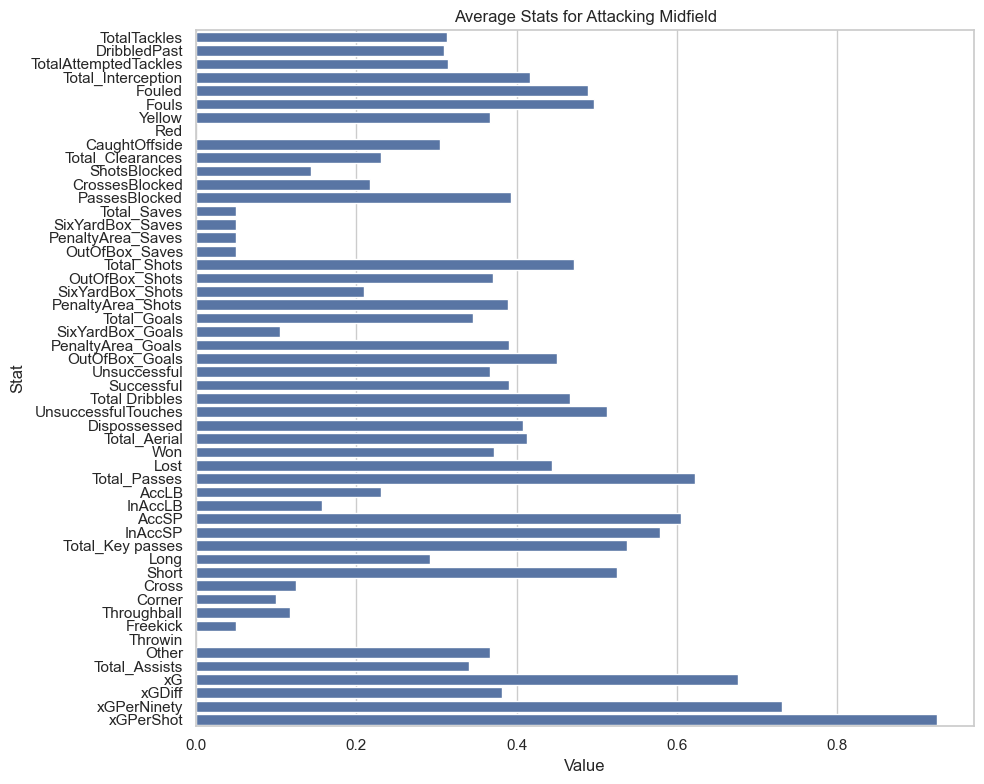

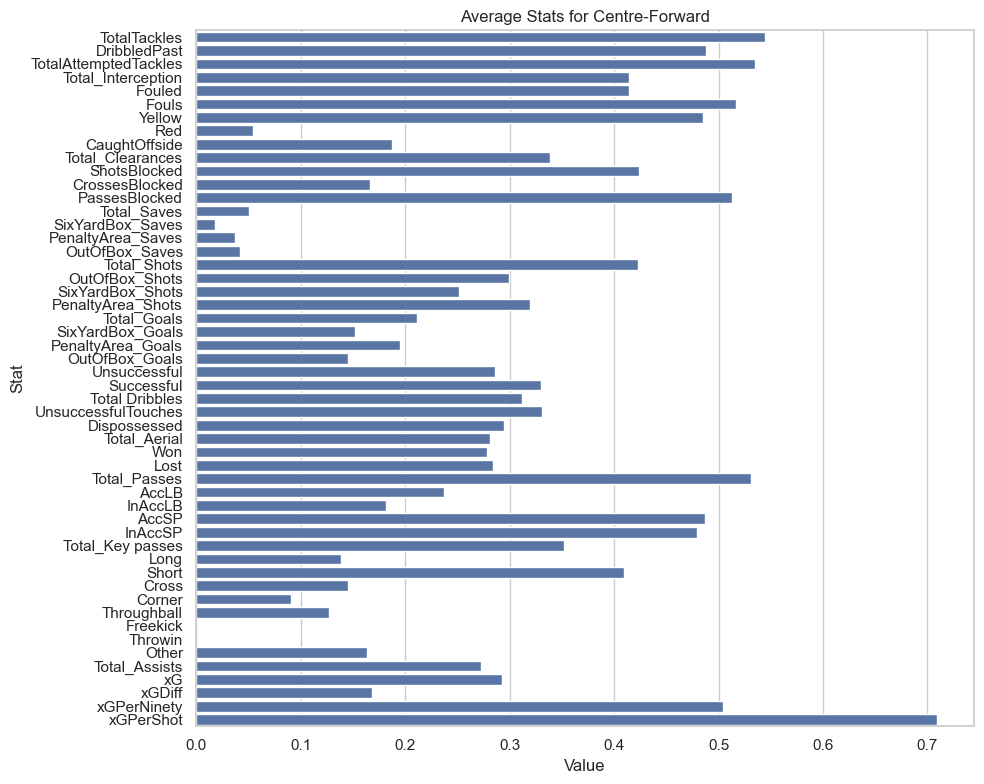

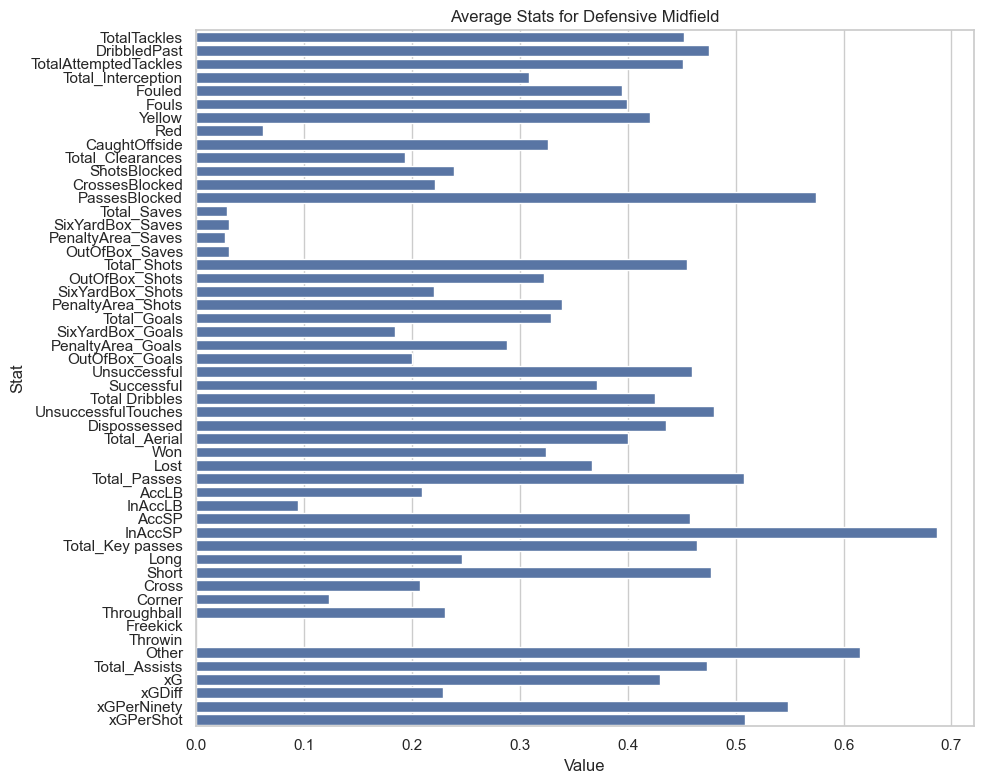

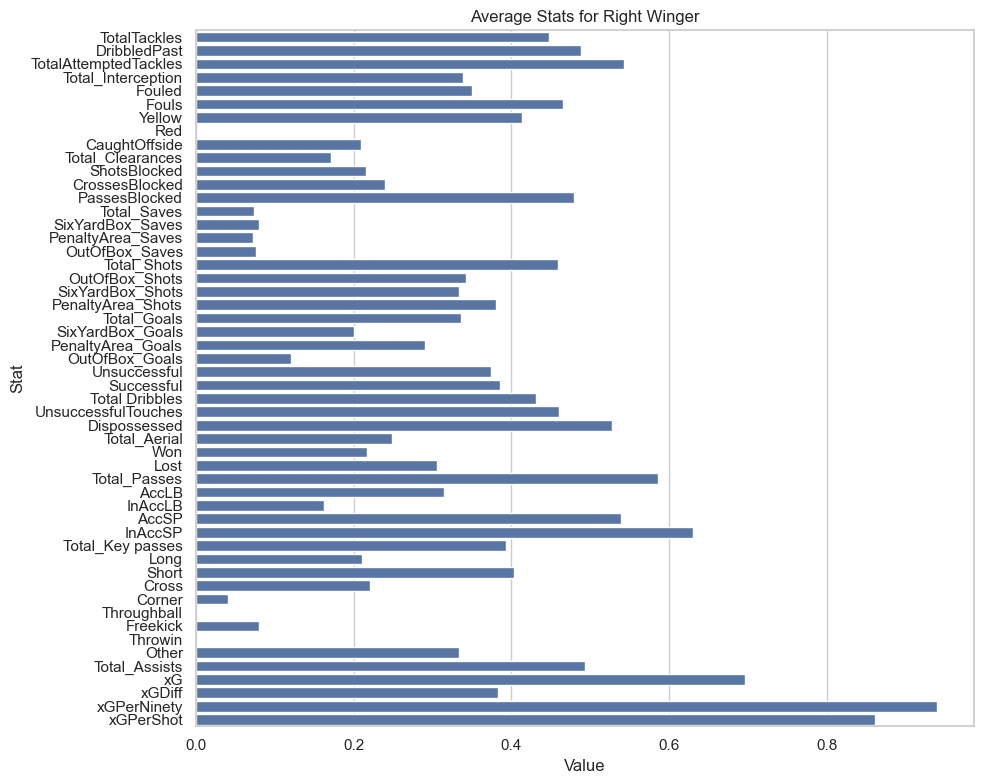

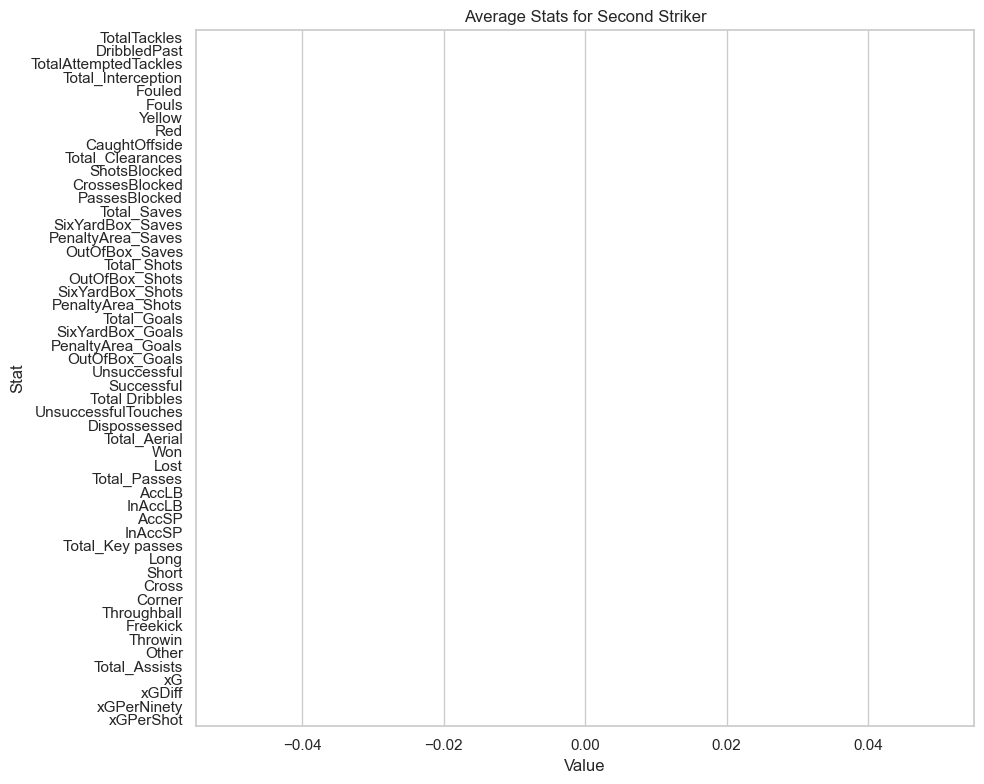

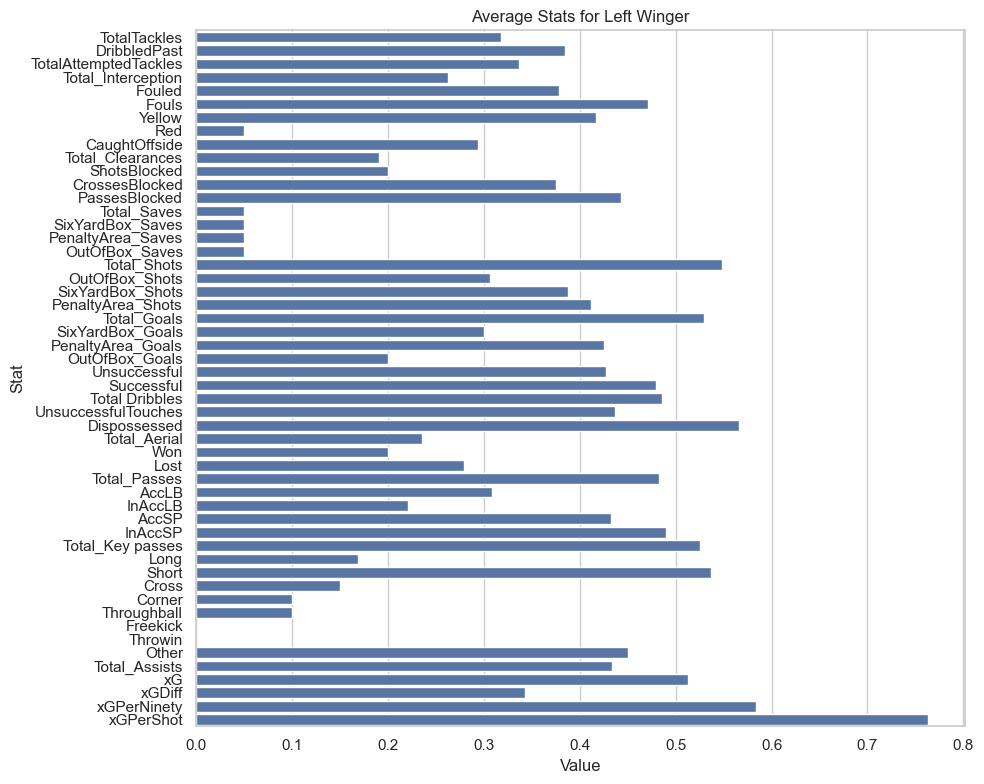

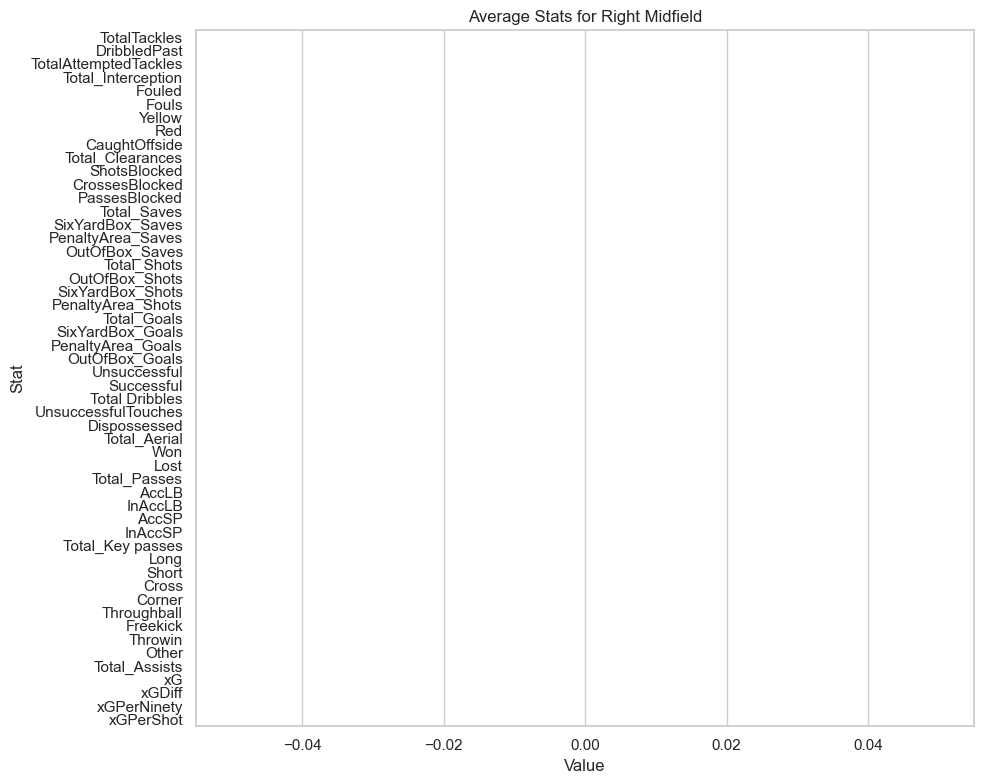

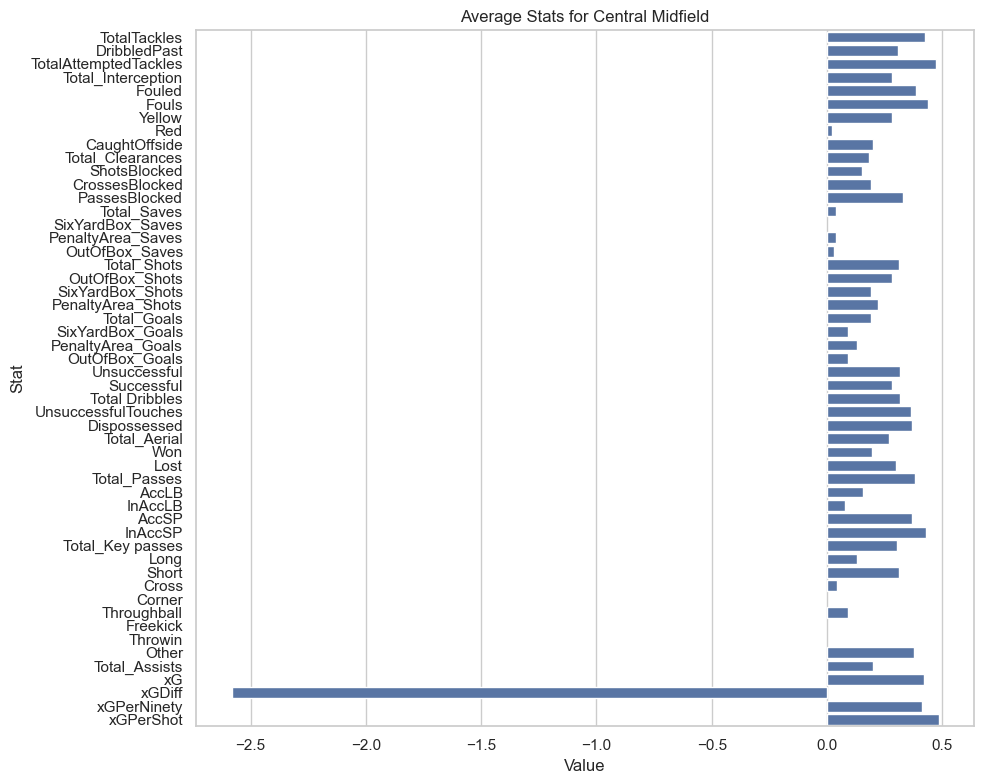

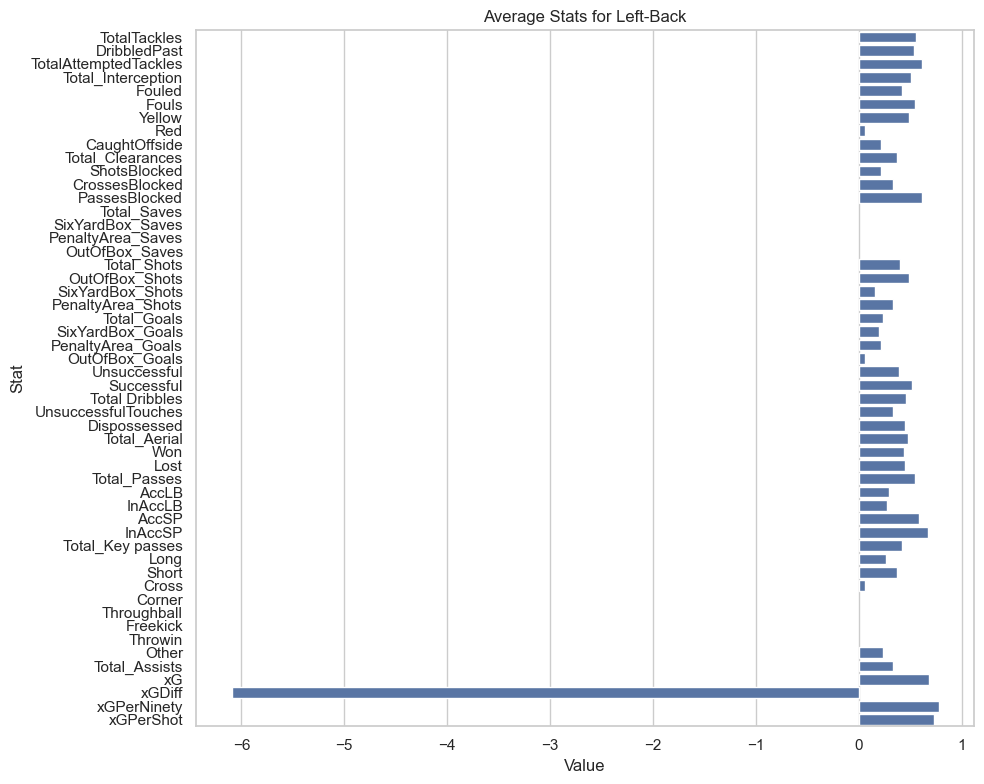

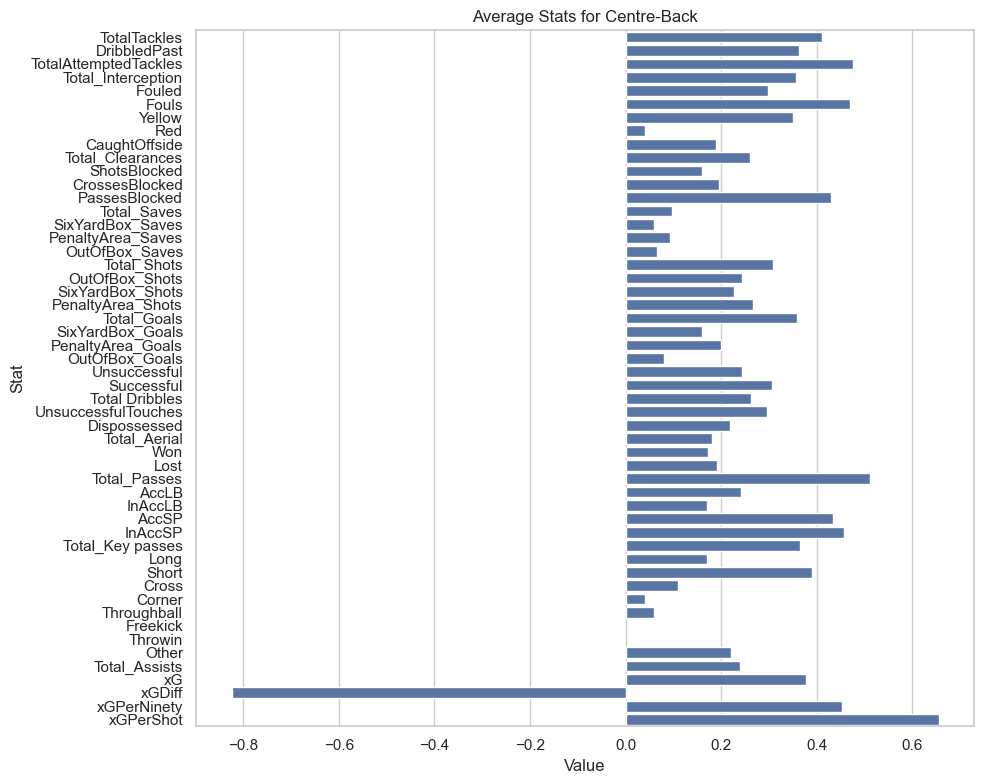

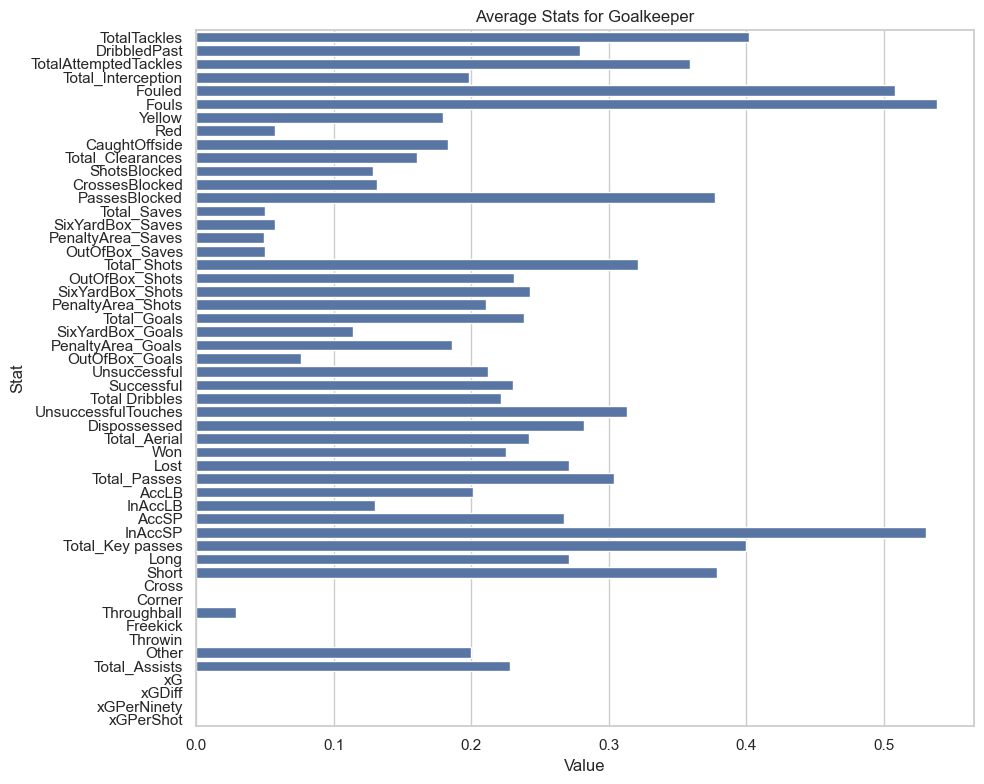

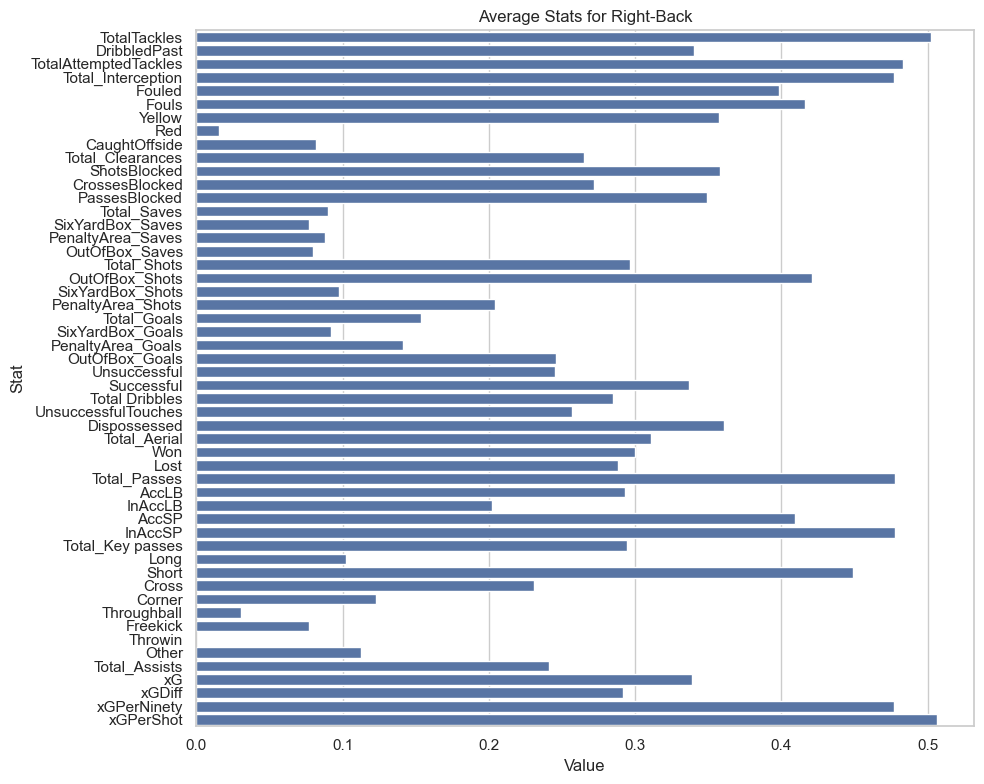

In [17]:
# def group_top_teams_by_position(all_players_stats, all_teams_stats):
#     all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
#     top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
#     print(top_teams)
    
#     top_teams_df = all_players_stats[all_players_stats['team_name'].isin(top_teams)].copy()
#     top_teams_df.loc[:, 'positions'] = top_teams_df[['position_1', 'position_2', 'position_3', 'position_4', 'position_5']].apply(
#         lambda x: [pos.strip() for pos in x if pd.notna(pos)], axis=1)
    
#     all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
#     position_groups = {pos: [] for pos in all_positions}
    
#     for _, row in top_teams_df.iterrows():
#         player_name = row['player_name']
#         player_positions = row['positions']
        
#         for pos in player_positions:
#             position_groups[pos].append(player_name)
    
#     return position_groups, top_teams

# position_groups, top_teams = group_top_teams_by_position(all_players_stats, all_teams_stats)
# # del position_groups['GK']

def group_top_teams_by_position(all_players_stats, all_teams_stats):
    all_teams_stats['Pts'] = pd.to_numeric(all_teams_stats['Pts'])
    top_teams = all_teams_stats.nlargest(15, 'Pts')['team_name'].tolist()
    print(top_teams)
    
    top_teams_df = all_players_stats[all_players_stats['team_name'].isin(top_teams)].copy()
    top_teams_df['positions'] = top_teams_df['position'].apply(lambda x: [pos.strip() for pos in x.split(',') if pd.notna(x)])
    
    all_positions = set(pos for positions in top_teams_df['positions'] for pos in positions)
    position_groups = {pos: [] for pos in all_positions}
    
    for _, row in top_teams_df.iterrows():
        player_name = row['player_name']
        player_positions = row['positions']
        
        for pos in player_positions:
            position_groups[pos].append(player_name)
    
    return position_groups, top_teams

for position, players in position_groups.items():
    position_df = all_players_details[all_players_details['player_name'].isin(players)].copy()
    numeric_cols = position_df.select_dtypes(include=[float, int]).columns
    position_df.loc[:, numeric_cols] = position_df.loc[:, numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).apply(lambda x: x/x.max(), axis=0)
    mean_stats = position_df.mean(numeric_only=True).reset_index()
    mean_stats.columns = ['Stat', 'Value']
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Value', y='Stat', data=mean_stats)
    plt.title(f"Average Stats for {position}")
    plt.tight_layout()
    plt.show()

# 4위부터 꼴찌팀까지 소속 선수들 중 top3팀 선수들의 평균스탯과 가장 가까운 선수들 구하기.

In [18]:
def extract_number_from_apps(apps):
    if pd.isna(apps):
        return 0
    match = re.search(r'(\d+)', str(apps))
    return int(match.group(1)) if match else 0

all_players_stats['Apps_numeric'] = all_players_stats['Apps'].apply(extract_number_from_apps) ## 출전 경기수 컬럼을 숫자형으로 처리

In [19]:
positions = list(position_groups.keys())
positions

['Attacking Midfield',
 'Centre-Forward',
 'Defensive Midfield',
 'Right Winger',
 'Second Striker',
 'Left Winger',
 'Right Midfield',
 'Central Midfield',
 'Left-Back',
 'Centre-Back',
 'Goalkeeper',
 'Right-Back']

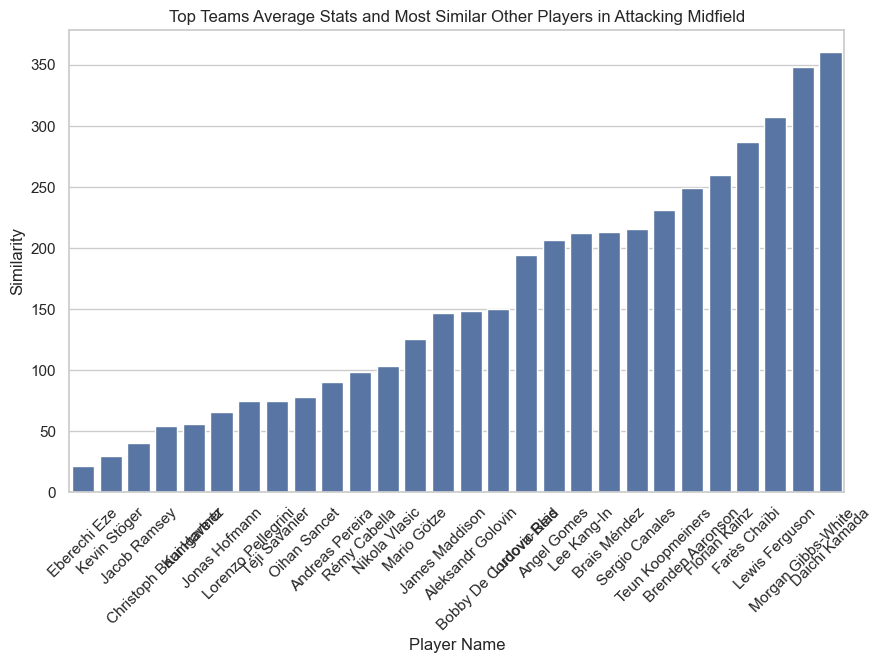

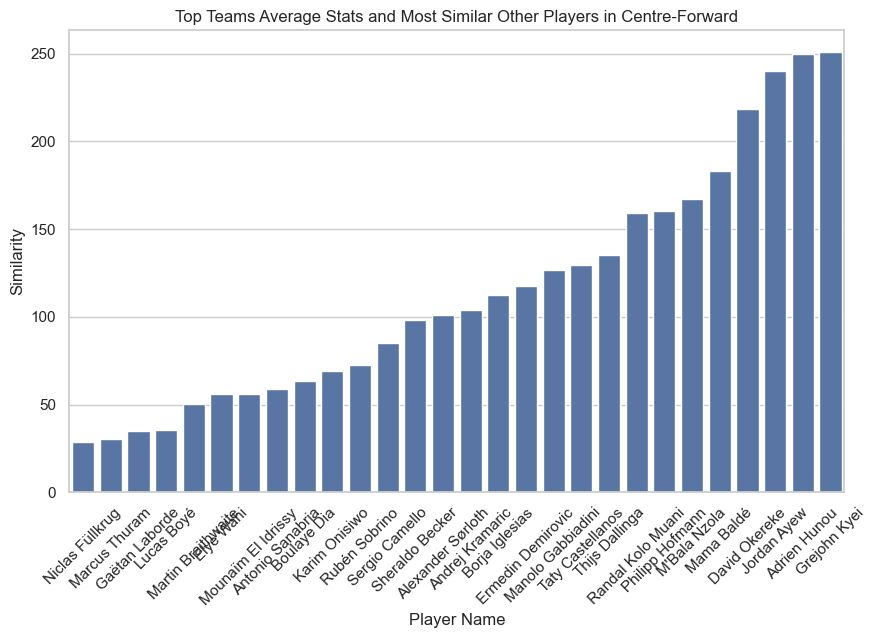

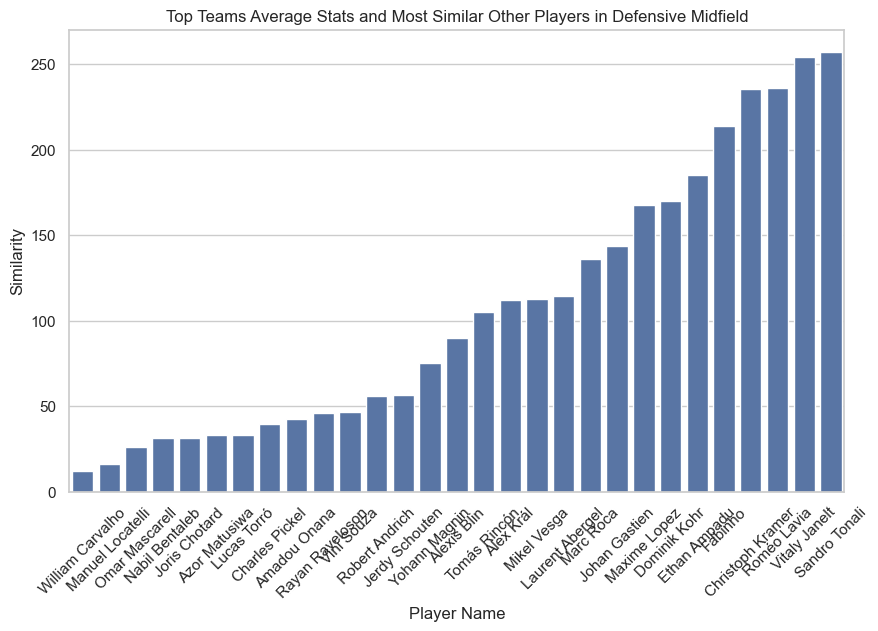

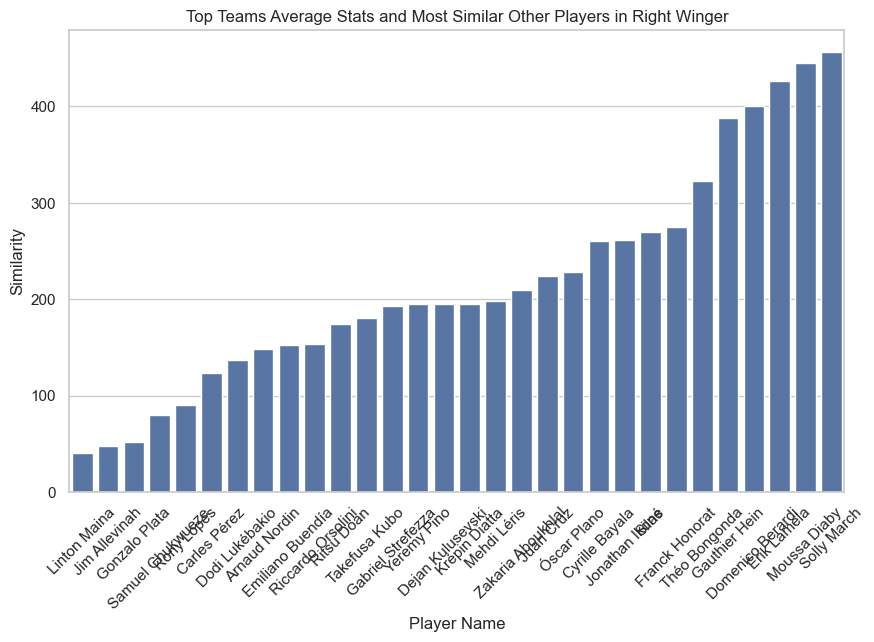

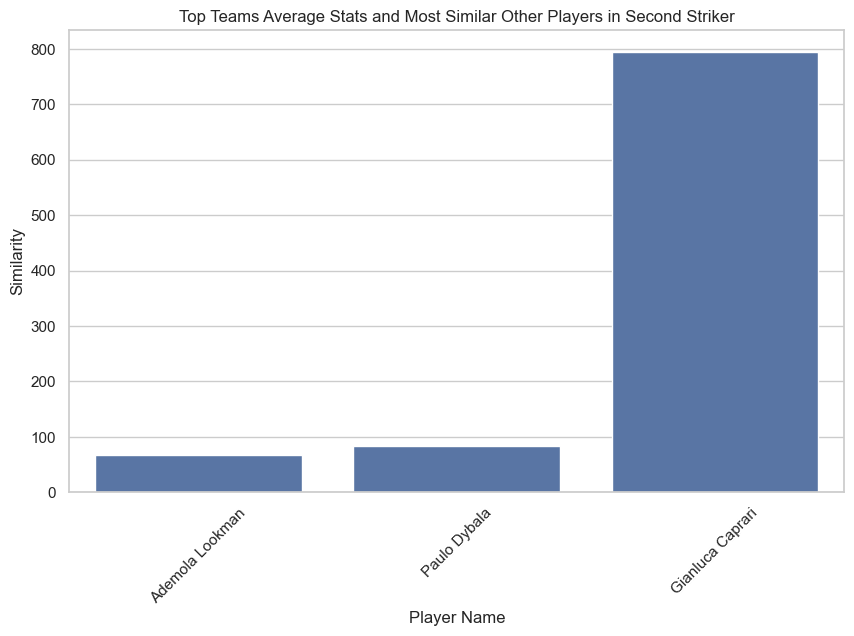

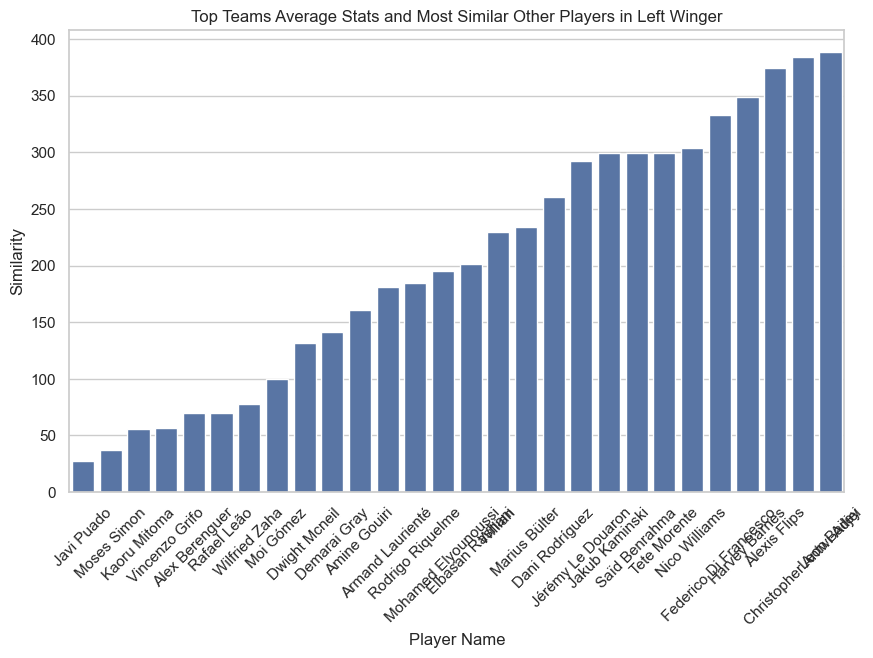

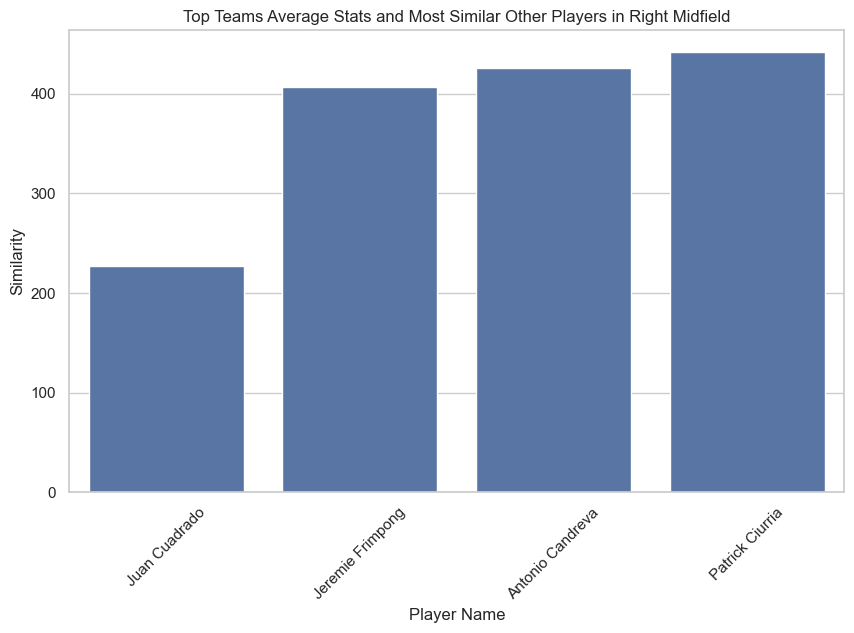

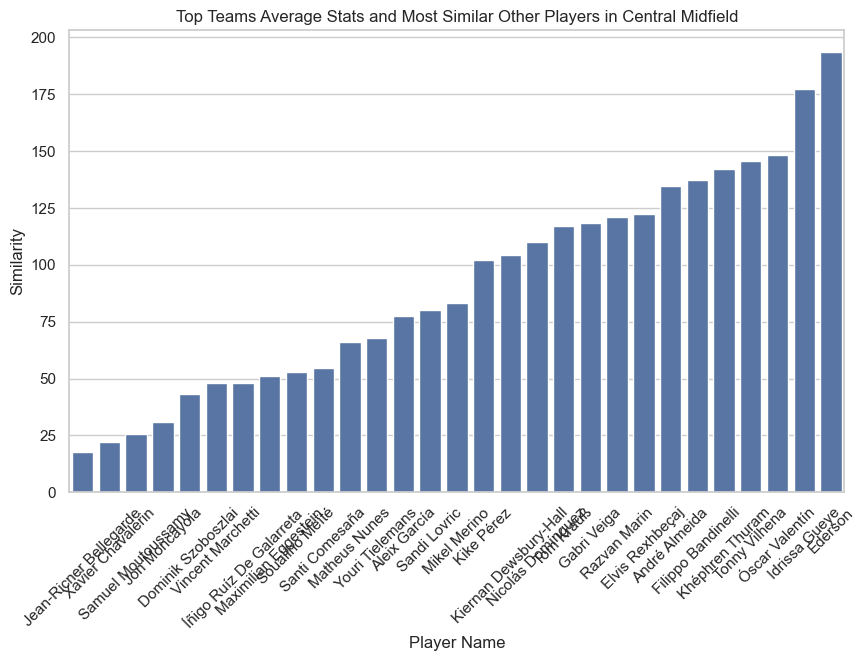

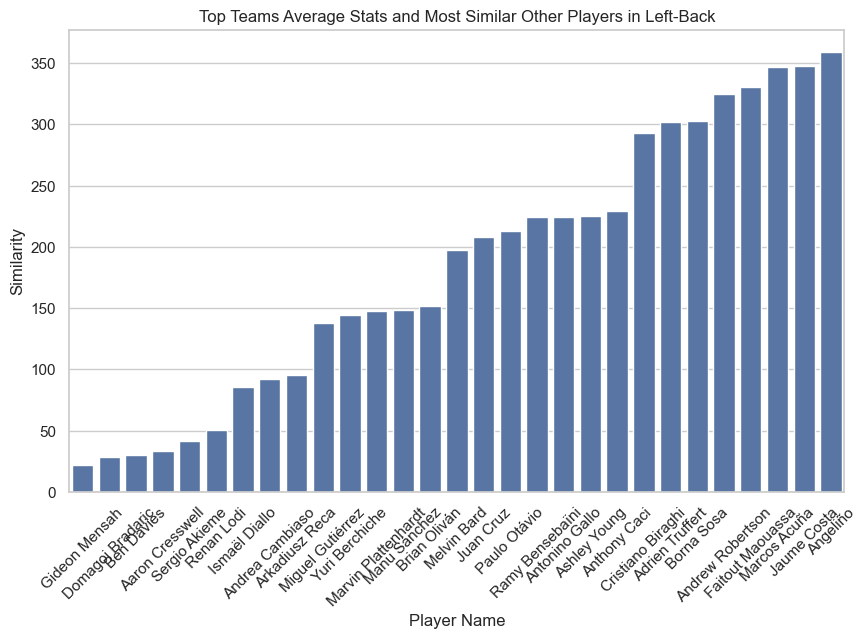

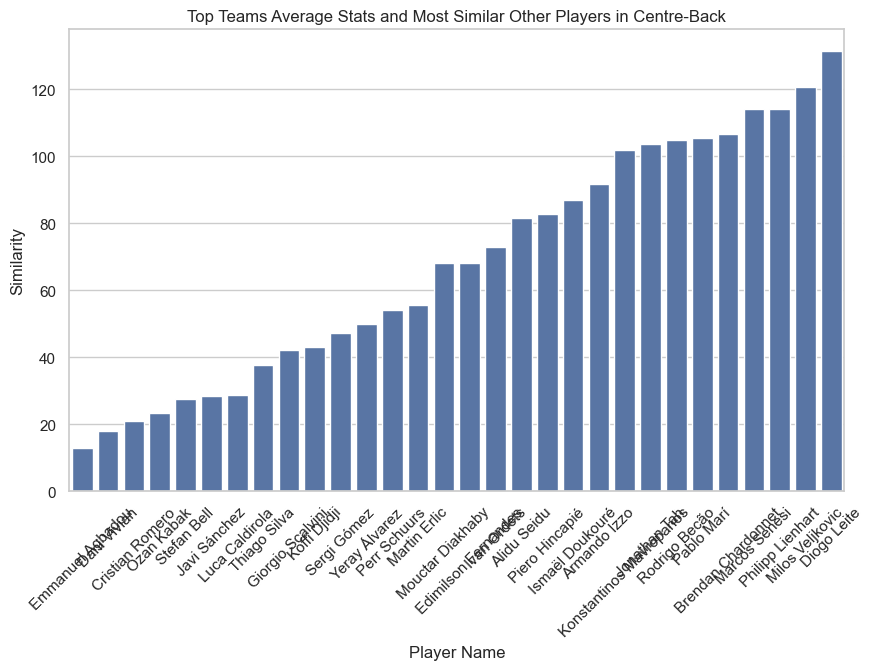

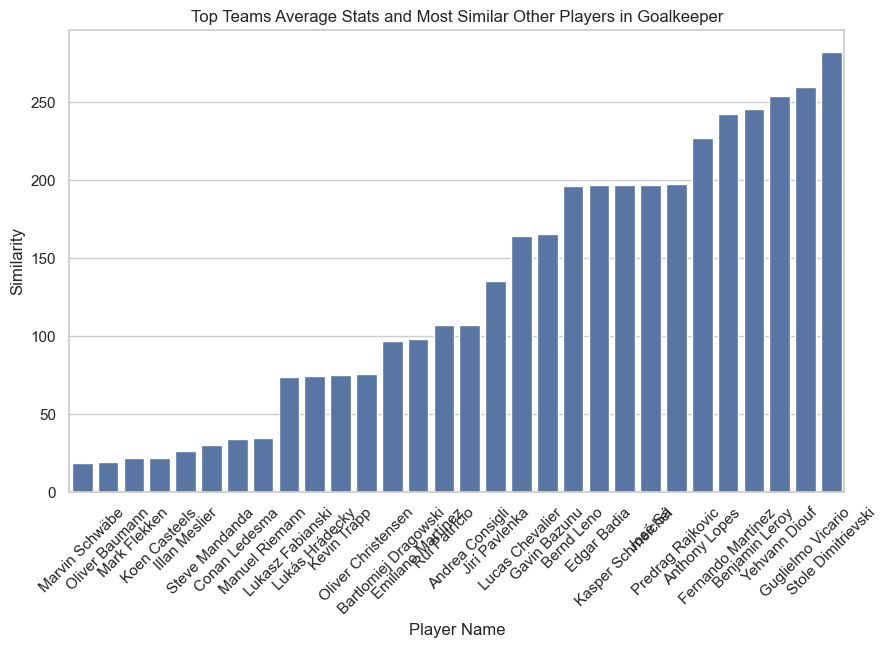

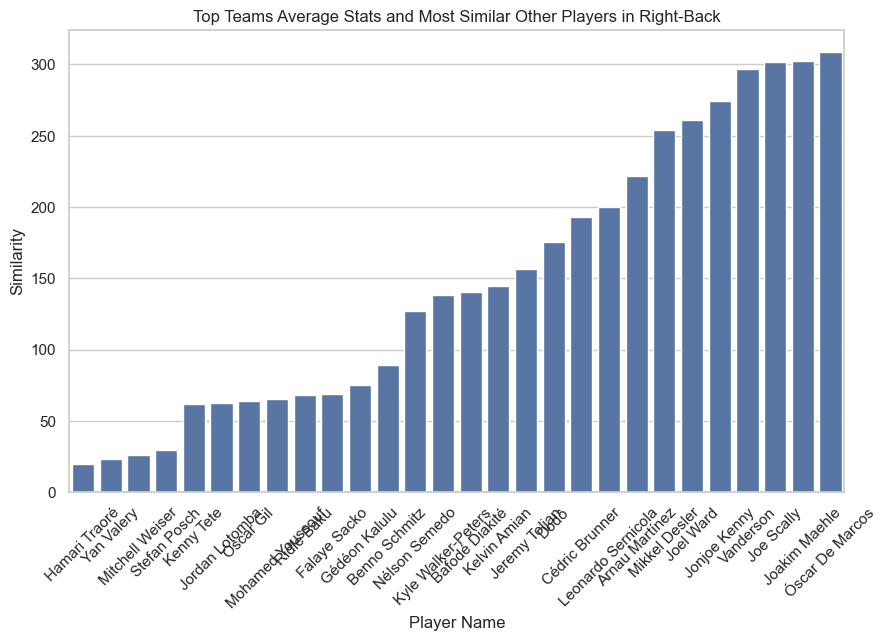

In [20]:
similar_players_by_position = {}

for position in positions:
    ## top3팀 선수들 중 현재 포지션에 해당하는 선수들만 필터링
    # top_position_players = all_players_stats[(all_players_stats['team_name'].isin(top_teams)) & 
    #                                          (all_players_stats['position'].str.contains(position))].copy()
    top_position_players = all_players_stats[(all_players_stats['team_name'].isin(top_teams)) &
                                             (all_players_stats['position'].str.contains(position)) &
                                             (all_players_stats['Apps_numeric'] >= 20)].copy()

    ## 스탯이 숫자인 열만 선택
    numeric_cols = top_position_players.select_dtypes(include=[np.number]).columns
    top_position_players[numeric_cols] = top_position_players[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    ## 포지션별 평균 스탯 계산
    position_mean_stats = top_position_players[numeric_cols].mean()

    ## 나머지 팀의 선수 중 현재 포지션에 해당하는 선수들
    # non_top_position_players = all_players_stats[(~all_players_stats['team_name'].isin(top_teams)) & 
    #                                              (all_players_stats['position'].str.contains(position))].copy()
    non_top_position_players = all_players_stats[(~all_players_stats['team_name'].isin(top_teams)) & 
                                                 (all_players_stats['position'].str.contains(position)) &
                                                 (all_players_stats['Apps_numeric'] >= 20)].copy()
    
    non_top_position_players[numeric_cols] = non_top_position_players[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

    ## 유사도 계산
    non_top_position_players['similarity'] = non_top_position_players[numeric_cols].apply(
        lambda x: euclidean(x, position_mean_stats), axis=1
    )

    ## 평균과 가장 유사한 선수들을 선별.(유사도가 낮을수록 유사함.)
    similar_players = non_top_position_players.nsmallest(N_SIMILAR, 'similarity')
    similar_players_by_position[position] = similar_players

for position, data in similar_players_by_position.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='player_name', y='similarity')
    plt.title(f'Top Teams Average Stats and Most Similar Other Players in {position}')
    plt.xlabel('Player Name')
    plt.ylabel('Similarity')
    plt.xticks(rotation=45)
    plt.show()

# Market value 반영

In [21]:
def convert_market_value(value):
    ## 값이 비어있거나 € 기호만 있는 경우 0으로 처리해야 된다.
    if not value or value.strip('€').strip().isalpha():
        return 0
    ## € 기호와 단위(m, k) 제거
    number_part = value.strip('€').replace('m', '').replace('k', '').strip()

    try:
        number = float(number_part)
    except ValueError:
        return 0  ## 변환할 수 없는 경우 0으로 처리함.
    ## m 또는 k가 있었다면 해당 단위로 숫자 조정
    if 'm' in value:
        return number * 1e6
    elif 'k' in value:
        return number * 1e3
    return number

all_players_values['Market Value'] = all_players_values['Market Value'].apply(convert_market_value)

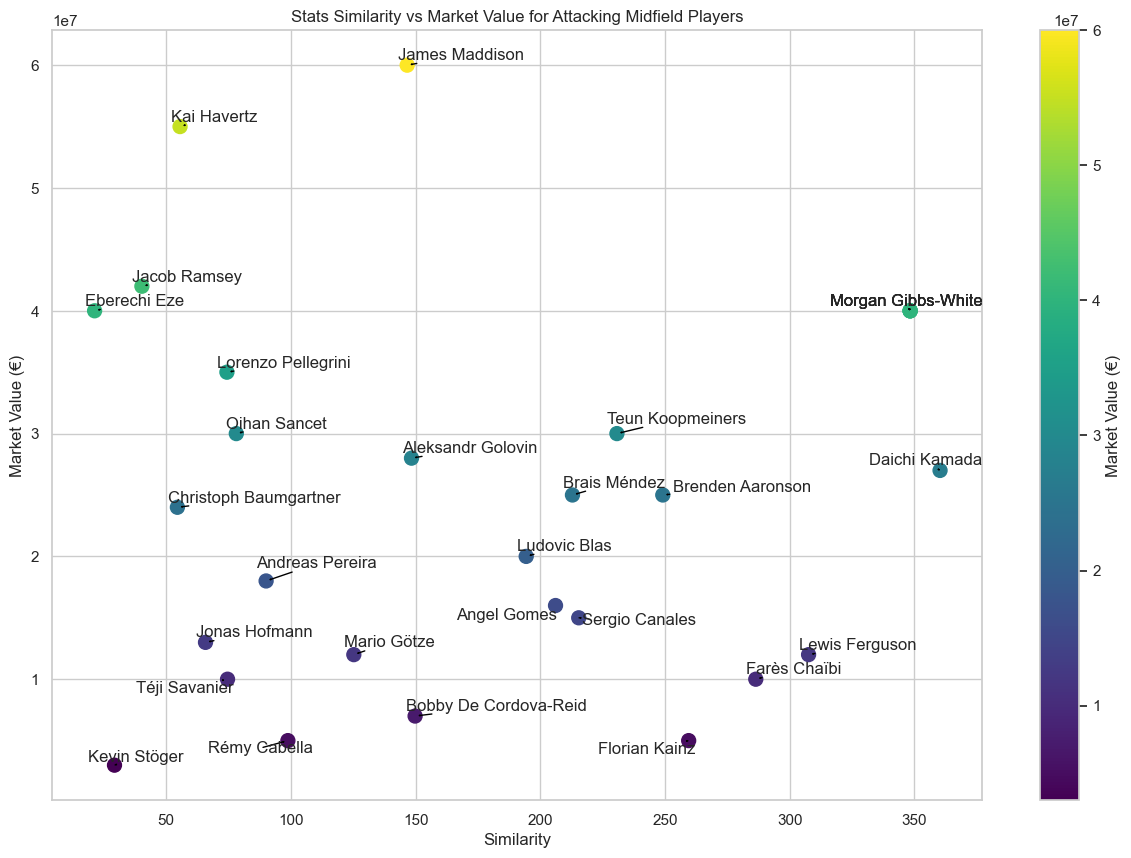

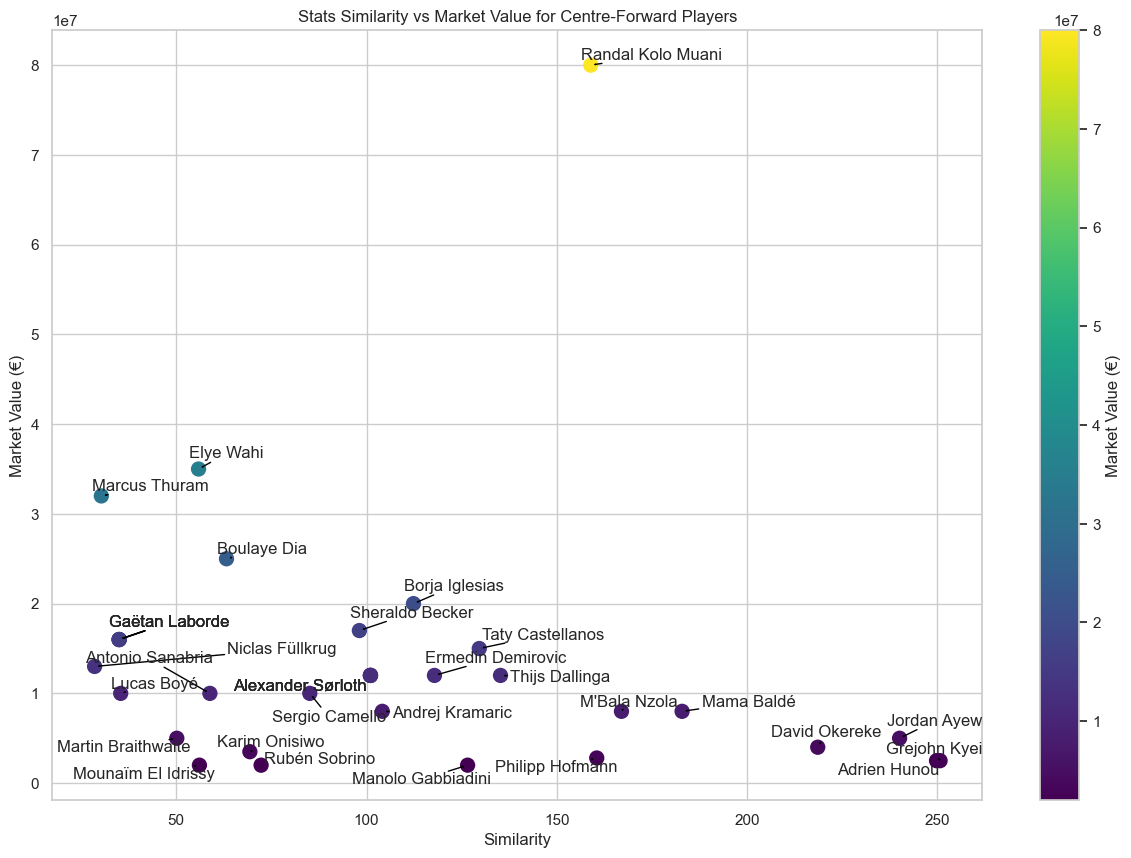

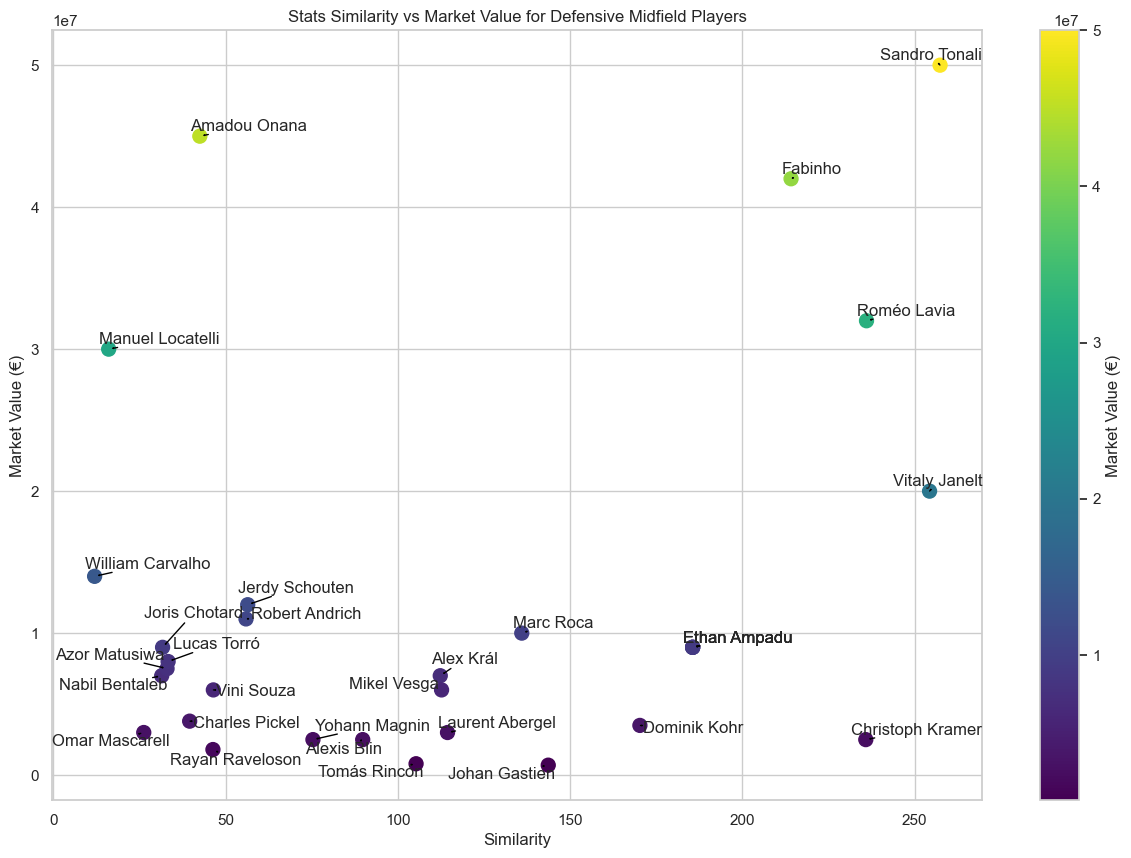

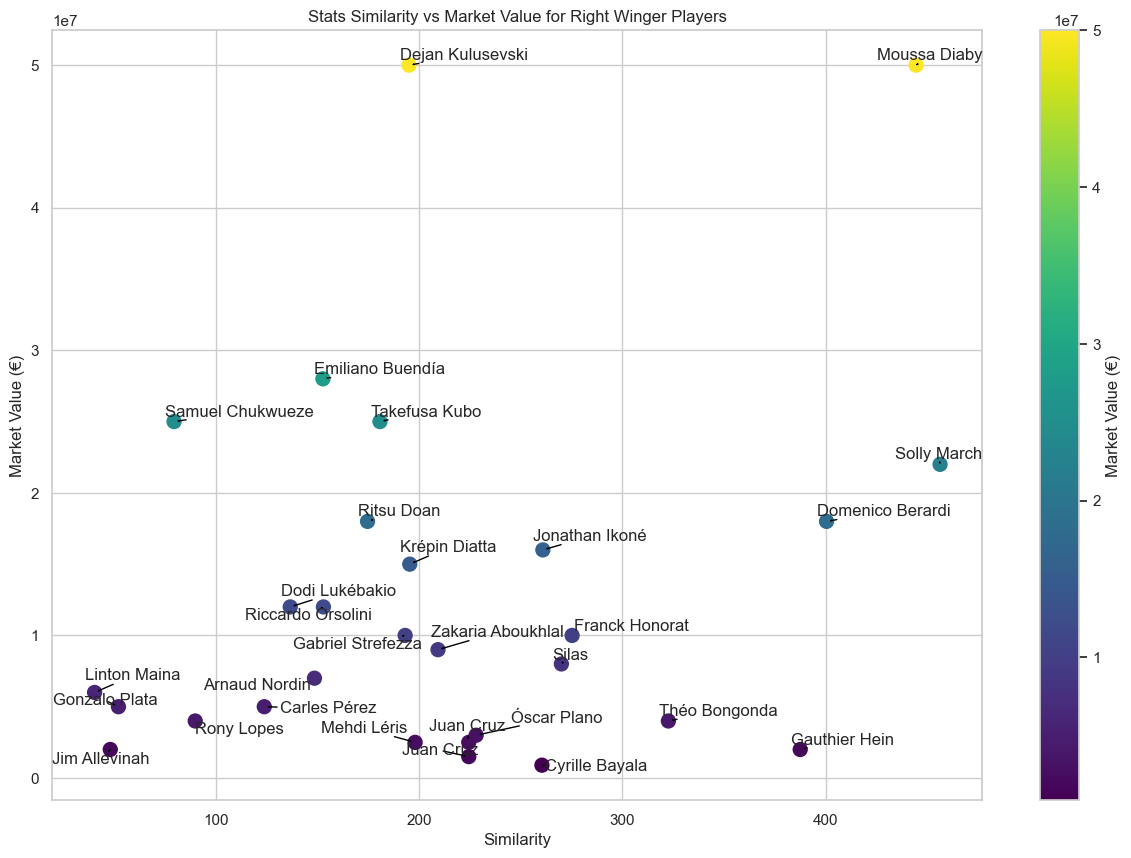

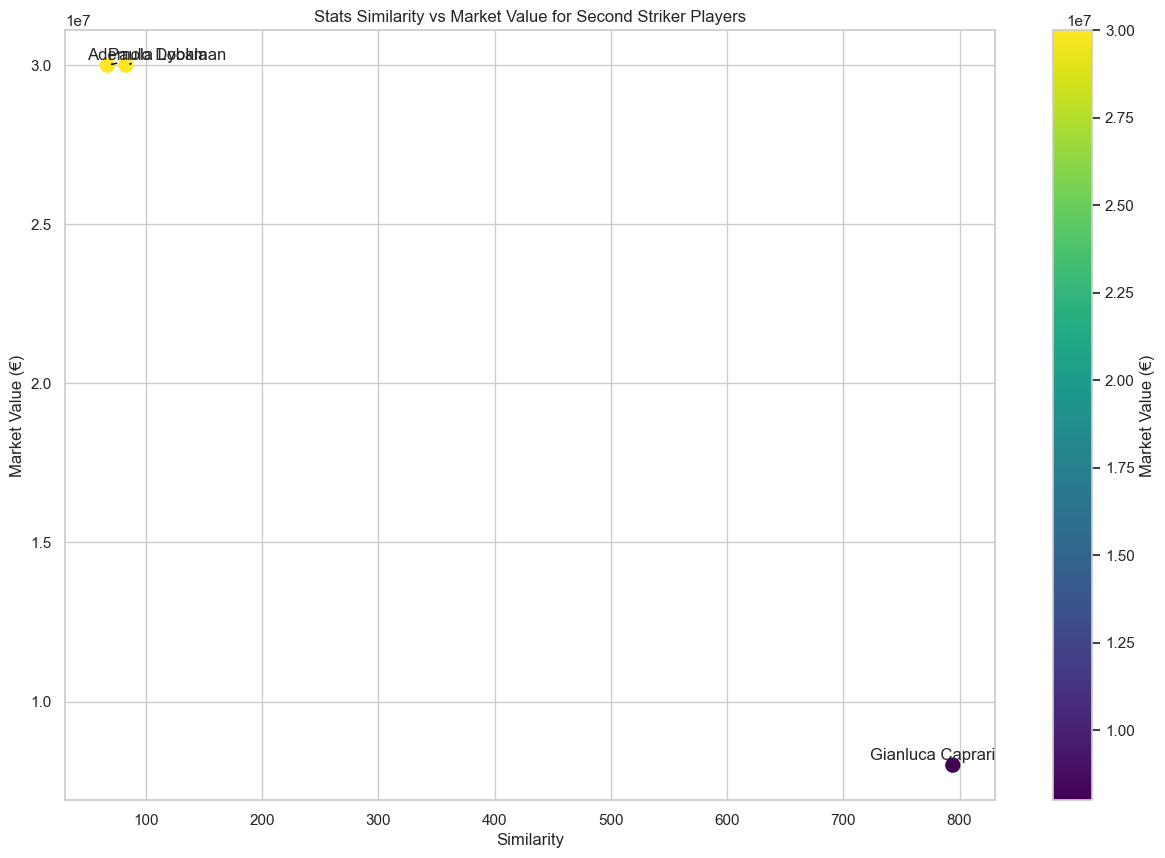

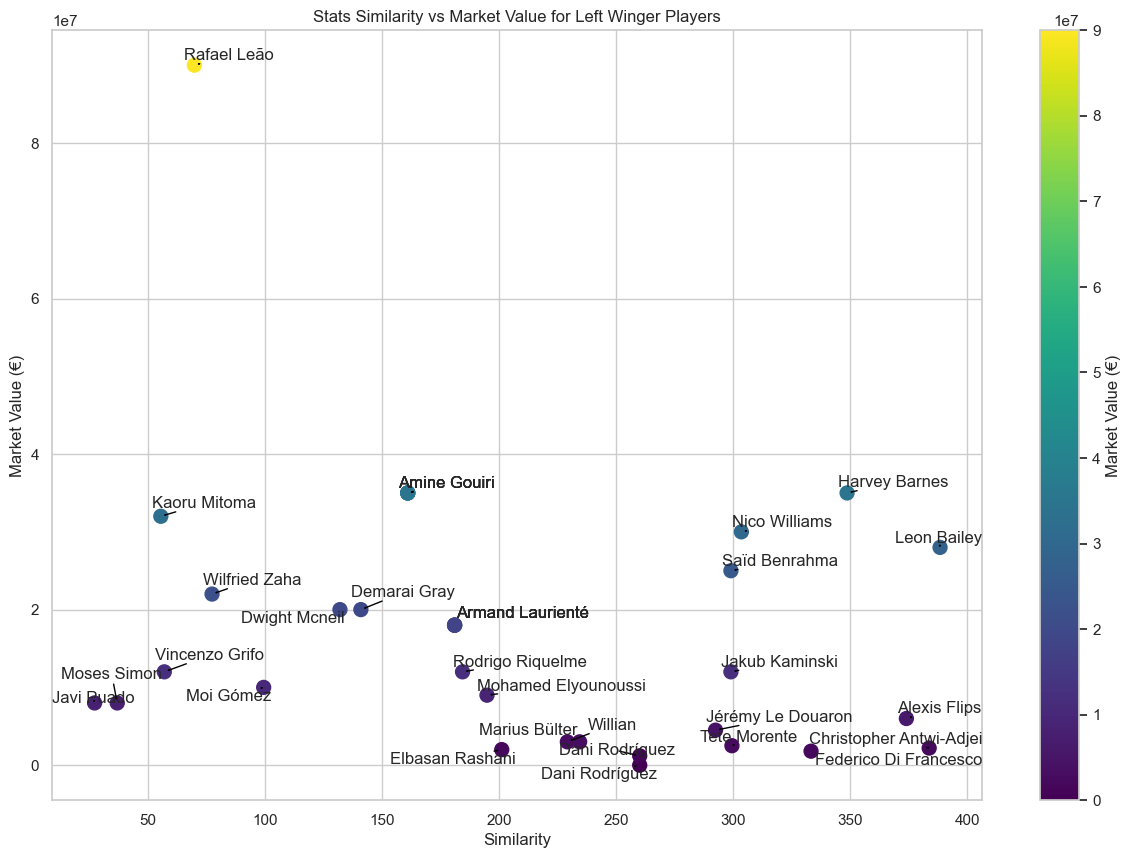

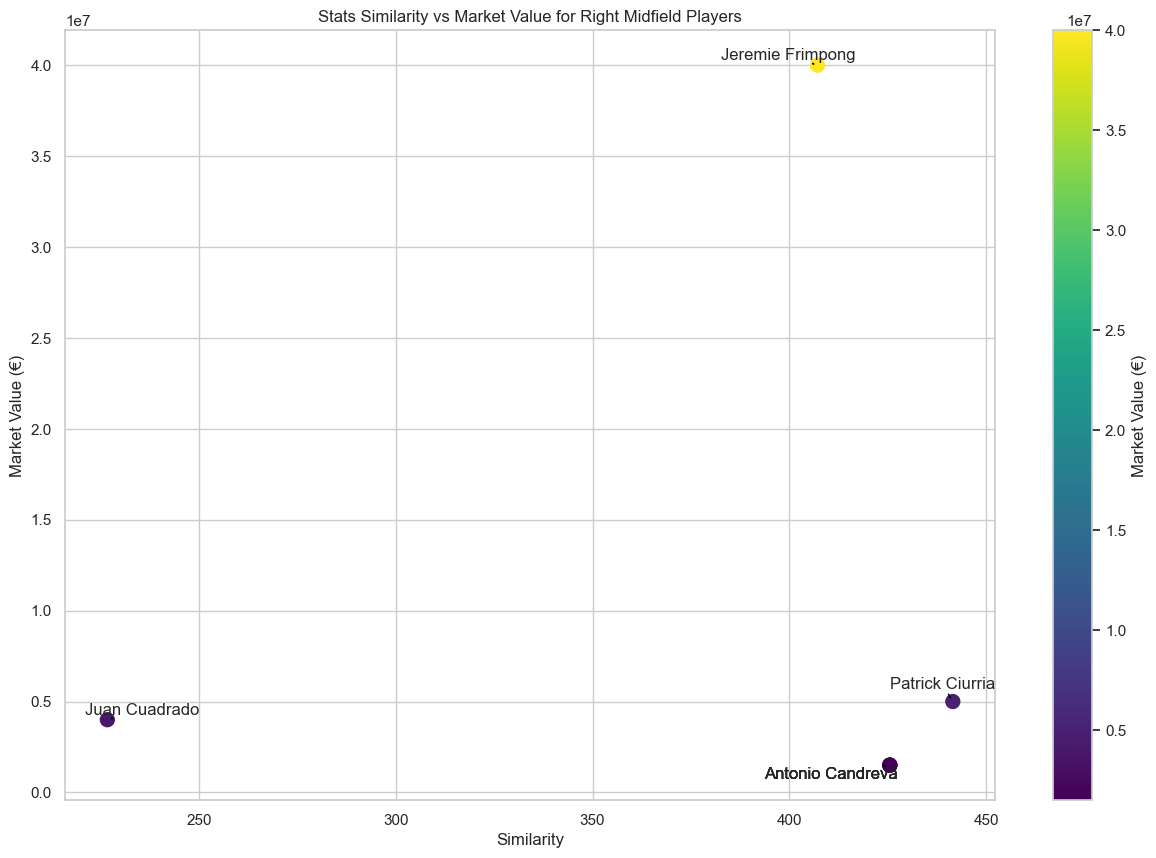

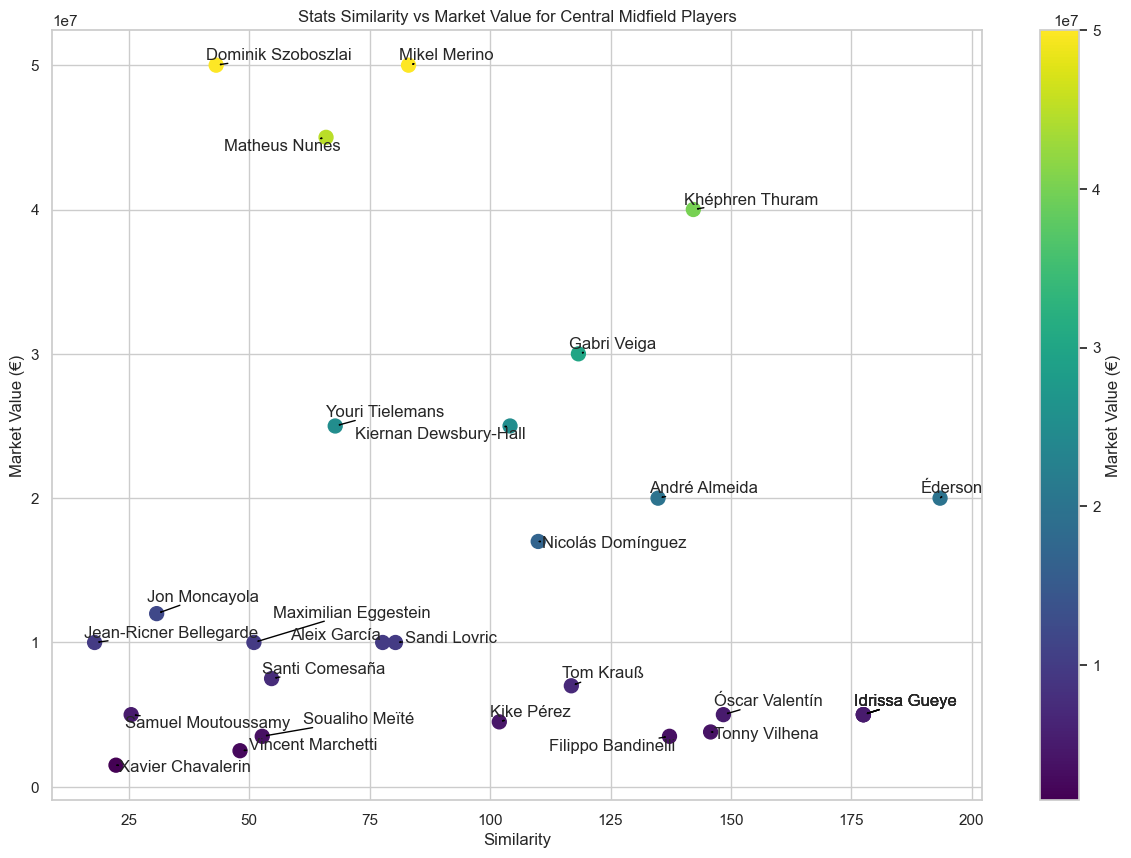

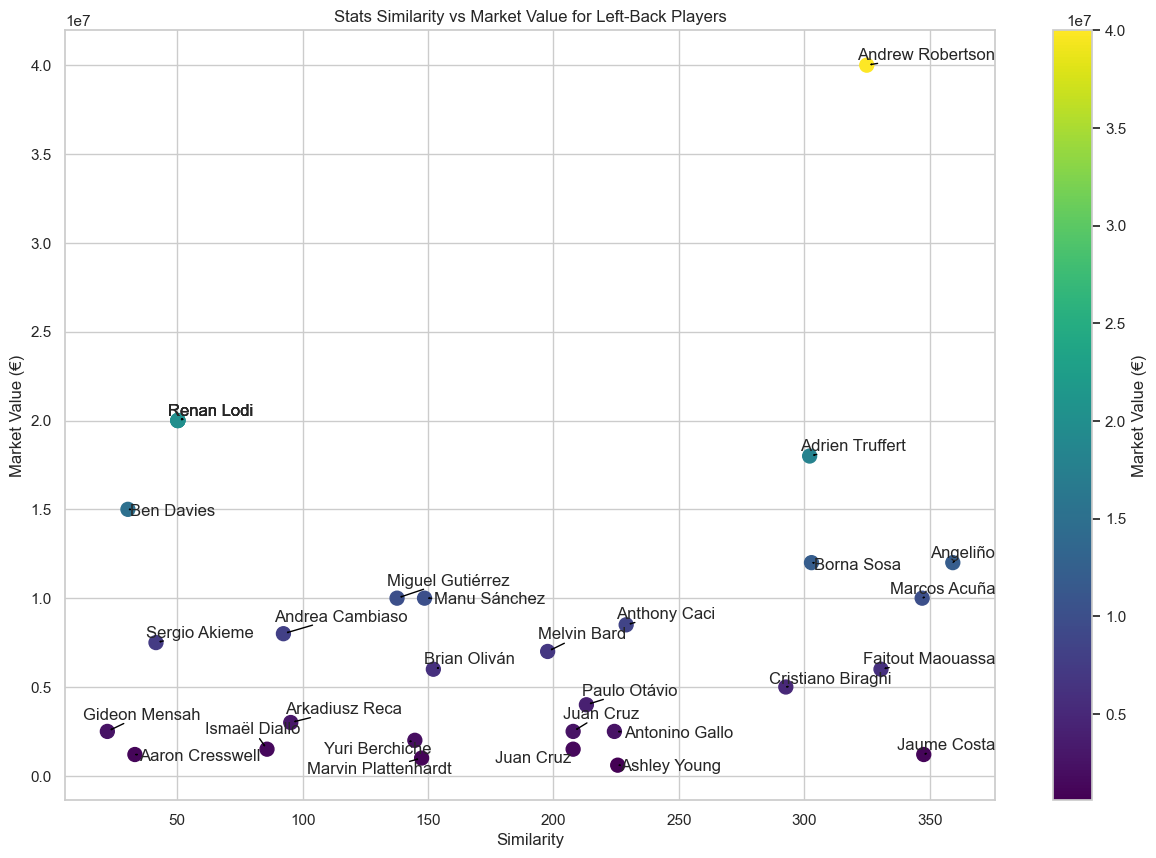

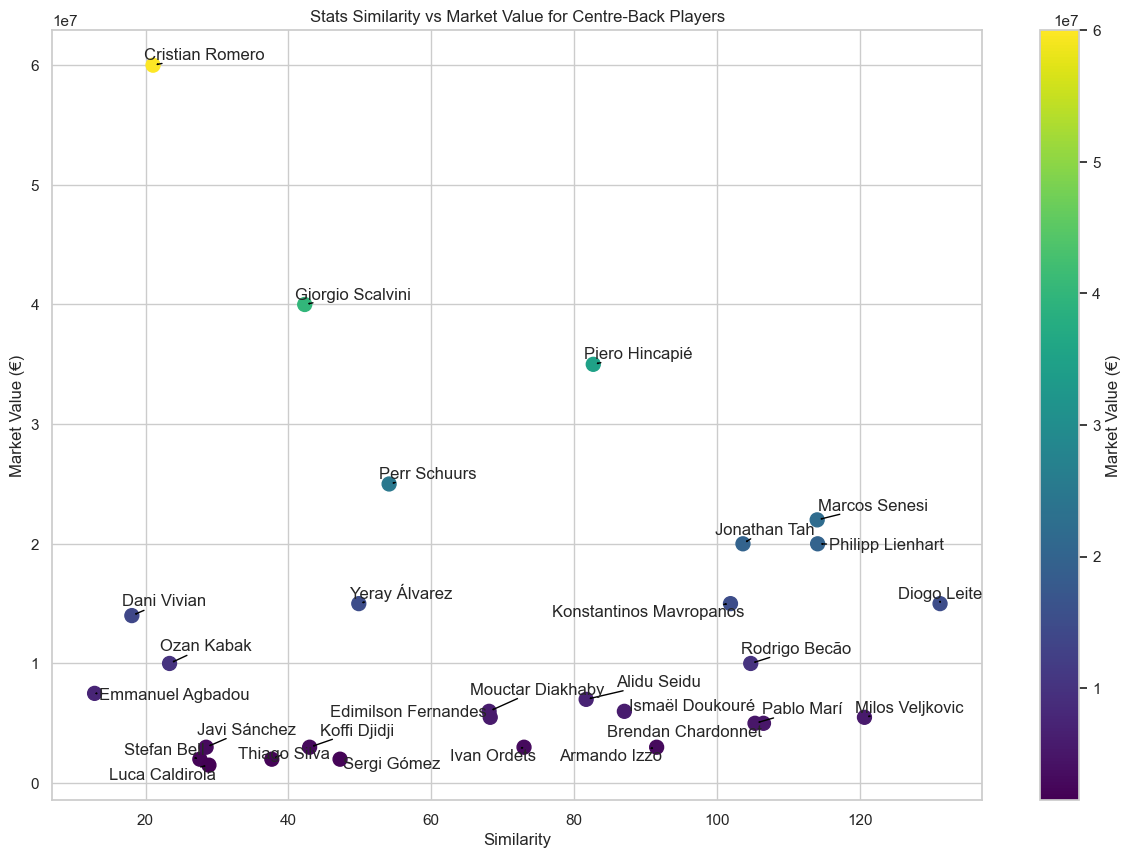

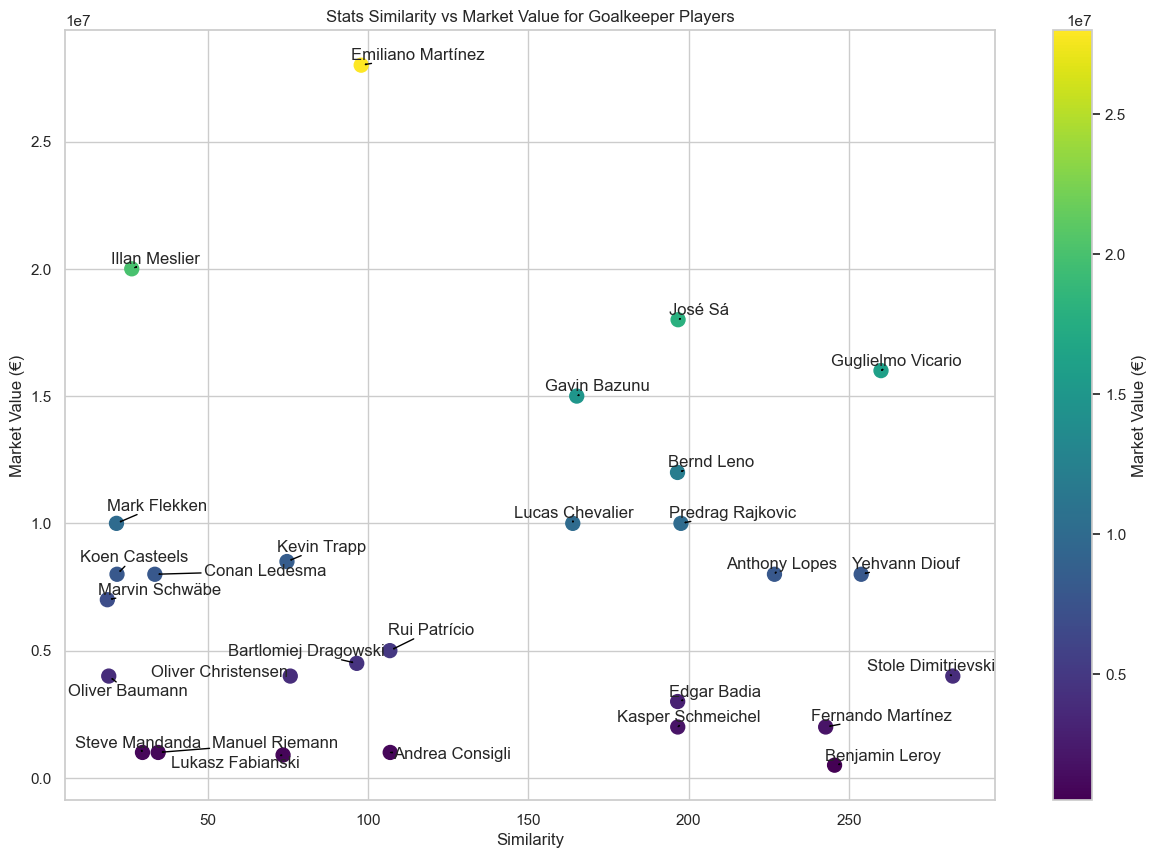

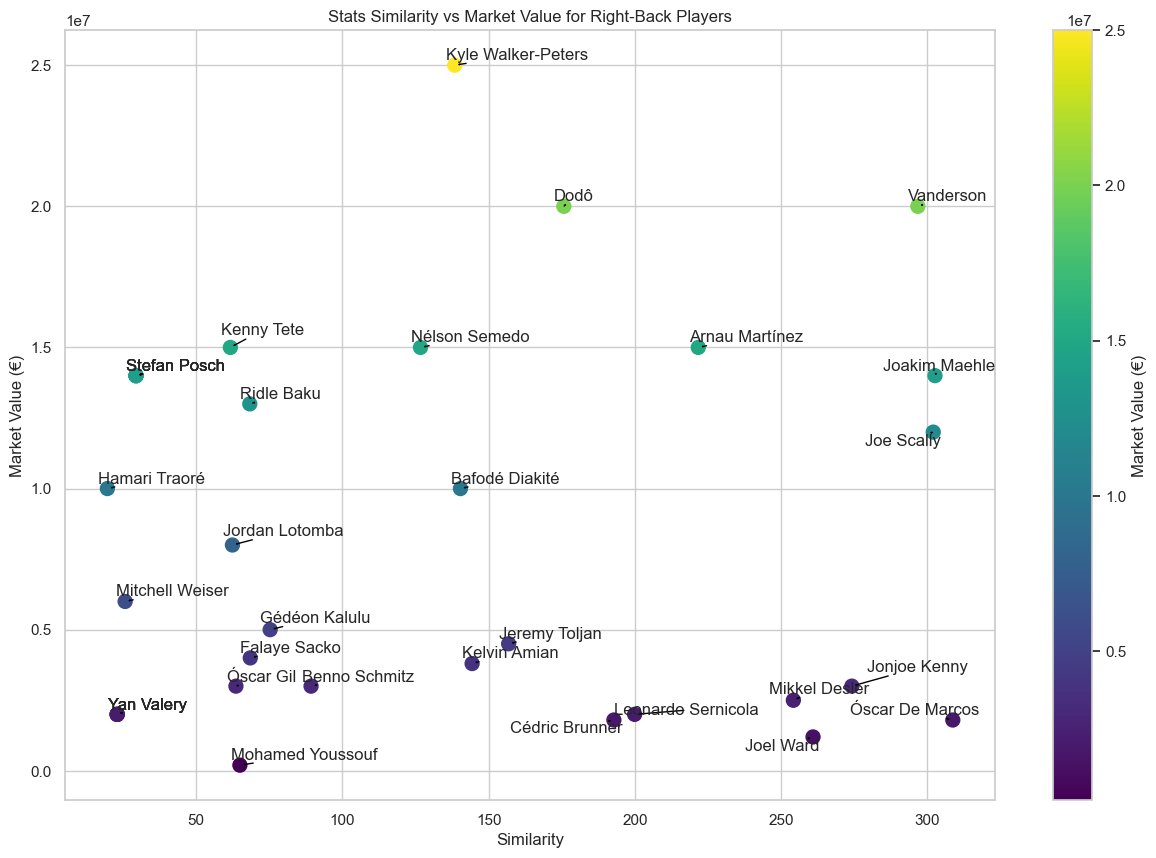

In [22]:
for position, players in similar_players_by_position.items():
    player_names = players['player_name'].tolist()
    market_values = all_players_values[all_players_values['Name'].isin(player_names)]
    plot_data = pd.merge(players[['player_name', 'similarity']], market_values.rename(columns={'Name': 'player_name'}), on='player_name')

    norm = Normalize(vmin=plot_data['Market Value'].min(), vmax=plot_data['Market Value'].max())
    cmap = plt.get_cmap('viridis')
    sm = ScalarMappable(norm=norm, cmap=cmap)
    
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(x=plot_data['similarity'], y=plot_data['Market Value'], s=100, c=plot_data['Market Value'].apply(lambda x: sm.to_rgba(x)))
    plt.colorbar(sm, label='Market Value (€)')

    texts = []
    for i, txt in enumerate(plot_data['player_name']):
        texts.append(plt.text(plot_data['similarity'].iloc[i], plot_data['Market Value'].iloc[i], txt, ha='center'))
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'))

    plt.xlabel('Similarity')
    plt.ylabel('Market Value (€)')
    plt.title(f'Stats Similarity vs Market Value for {position} Players')
    plt.show()